### Importar Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
from sklearn.preprocessing import StandardScaler
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBClassifier
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE


### Cargar Dataset

@misc{rabie_el_kharoua_2024,
title={Alzheimer's Disease Dataset},
url={https://www.kaggle.com/dsv/8668279},
DOI={10.34740/KAGGLE/DSV/8668279},
publisher={Kaggle},
author={Rabie El Kharoua},
year={2024}
}

In [2]:
path=r'..\DATASET\alzheimers_disease_data.csv'
df = pd.read_csv(path, delimiter=",")

### Analisis Dataset

In [3]:
df.head().T

,0,1,2,3,4
PatientID,4751,4752,4753,4754,4755
Age,73,89,73,74,89
Gender,0,0,0,1,0
Ethnicity,0,0,3,0,0
EducationLevel,2,0,1,1,0
BMI,22.927749,26.827681,17.795882,33.800817,20.716974
Smoking,0,0,0,1,0
AlcoholConsumption,13.297218,4.542524,19.555085,12.209266,18.454356
PhysicalActivity,6.327112,7.619885,7.844988,8.428001,6.310461
DietQuality,1.347214,0.518767,1.826335,7.435604,0.795498


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

Se identifican 2149 registros y 35 variables: 12 de tipo float64, 22 de tipo int64 y 1 de tipo object.

### Clean Data

#### NaNs

In [5]:
nan_ser = df.isna().sum().sort_values(ascending=False)
nan_ser[nan_ser > 0]

Series([], dtype: int64)

No se encuentran valores NaN

In [6]:
df[df.duplicated(keep=False)]

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge


#### Duplicados

No se encuentran valores duplicados

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


#### Useless Features

Se valida que la variable DoctorInCharge tiene el mismo valor para todos los registros.

In [8]:
df.DoctorInCharge.value_counts()

DoctorInCharge
XXXConfid    2149
Name: count, dtype: int64

Se valida que el campo representa el ID unico de paciente.

In [9]:
df.PatientID.value_counts()

PatientID
4751    1
6179    1
6193    1
6192    1
6191    1
       ..
5462    1
5461    1
5460    1
5459    1
6899    1
Name: count, Length: 2149, dtype: int64

Descartamos las dos variables que sabemos no tienen utilidad para la predicción.

In [10]:
df.drop(['PatientID', 'DoctorInCharge'], axis=1, inplace=True)

### Exploratory Data Analysis (EDA)

#### Numerical features distribution

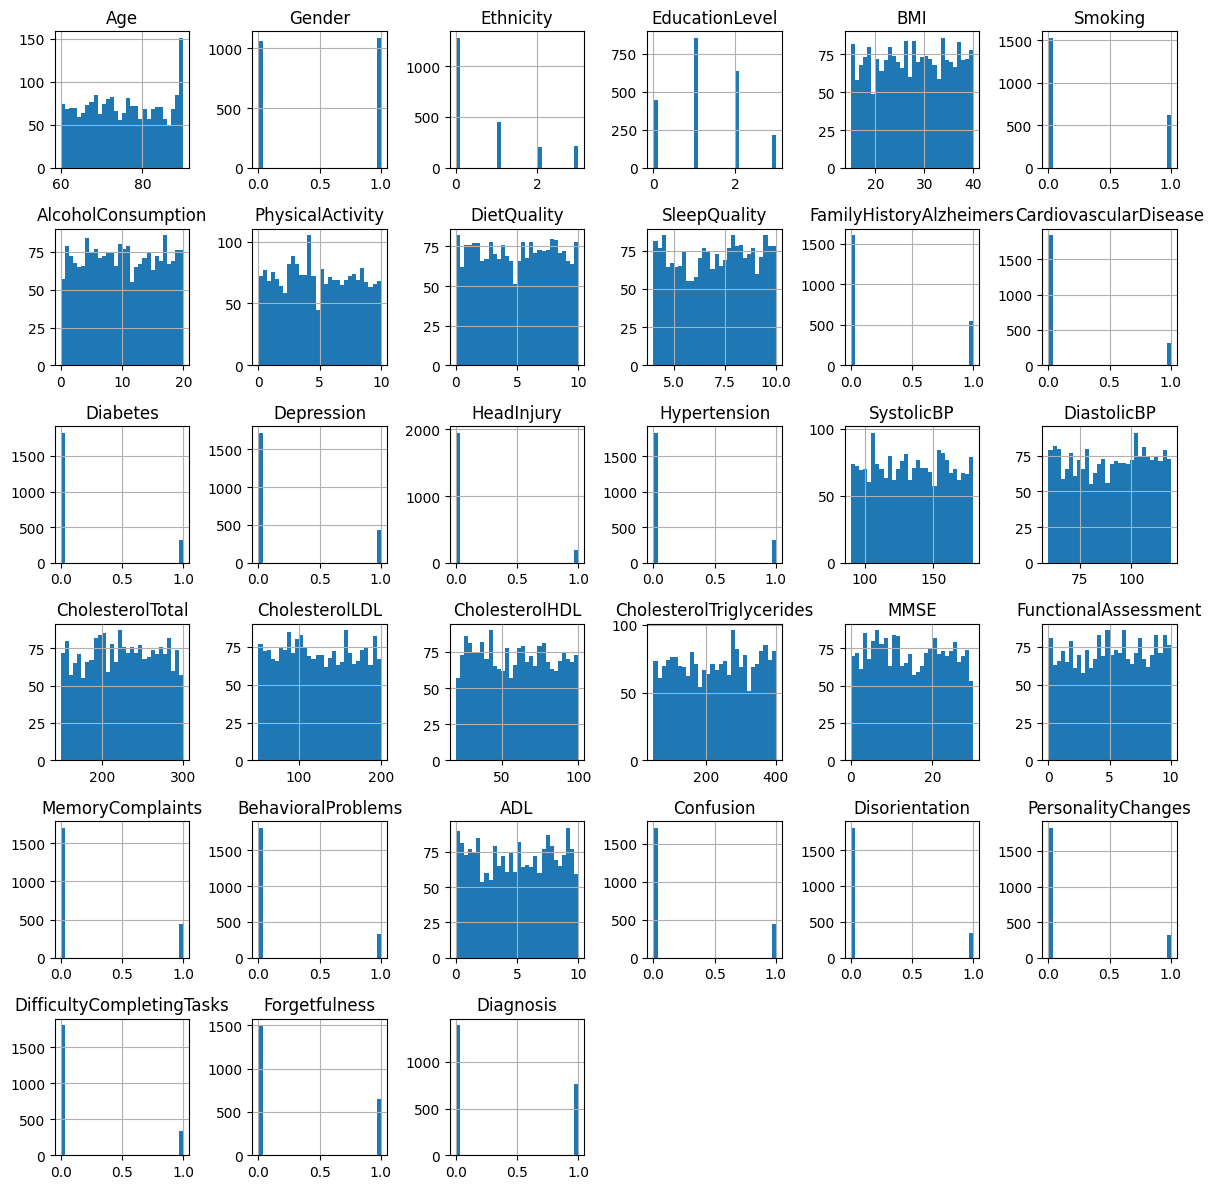

In [11]:
df.hist(bins=30, figsize=(12, 12))
plt.tight_layout()
plt.show()

#### Inspección de Outliers

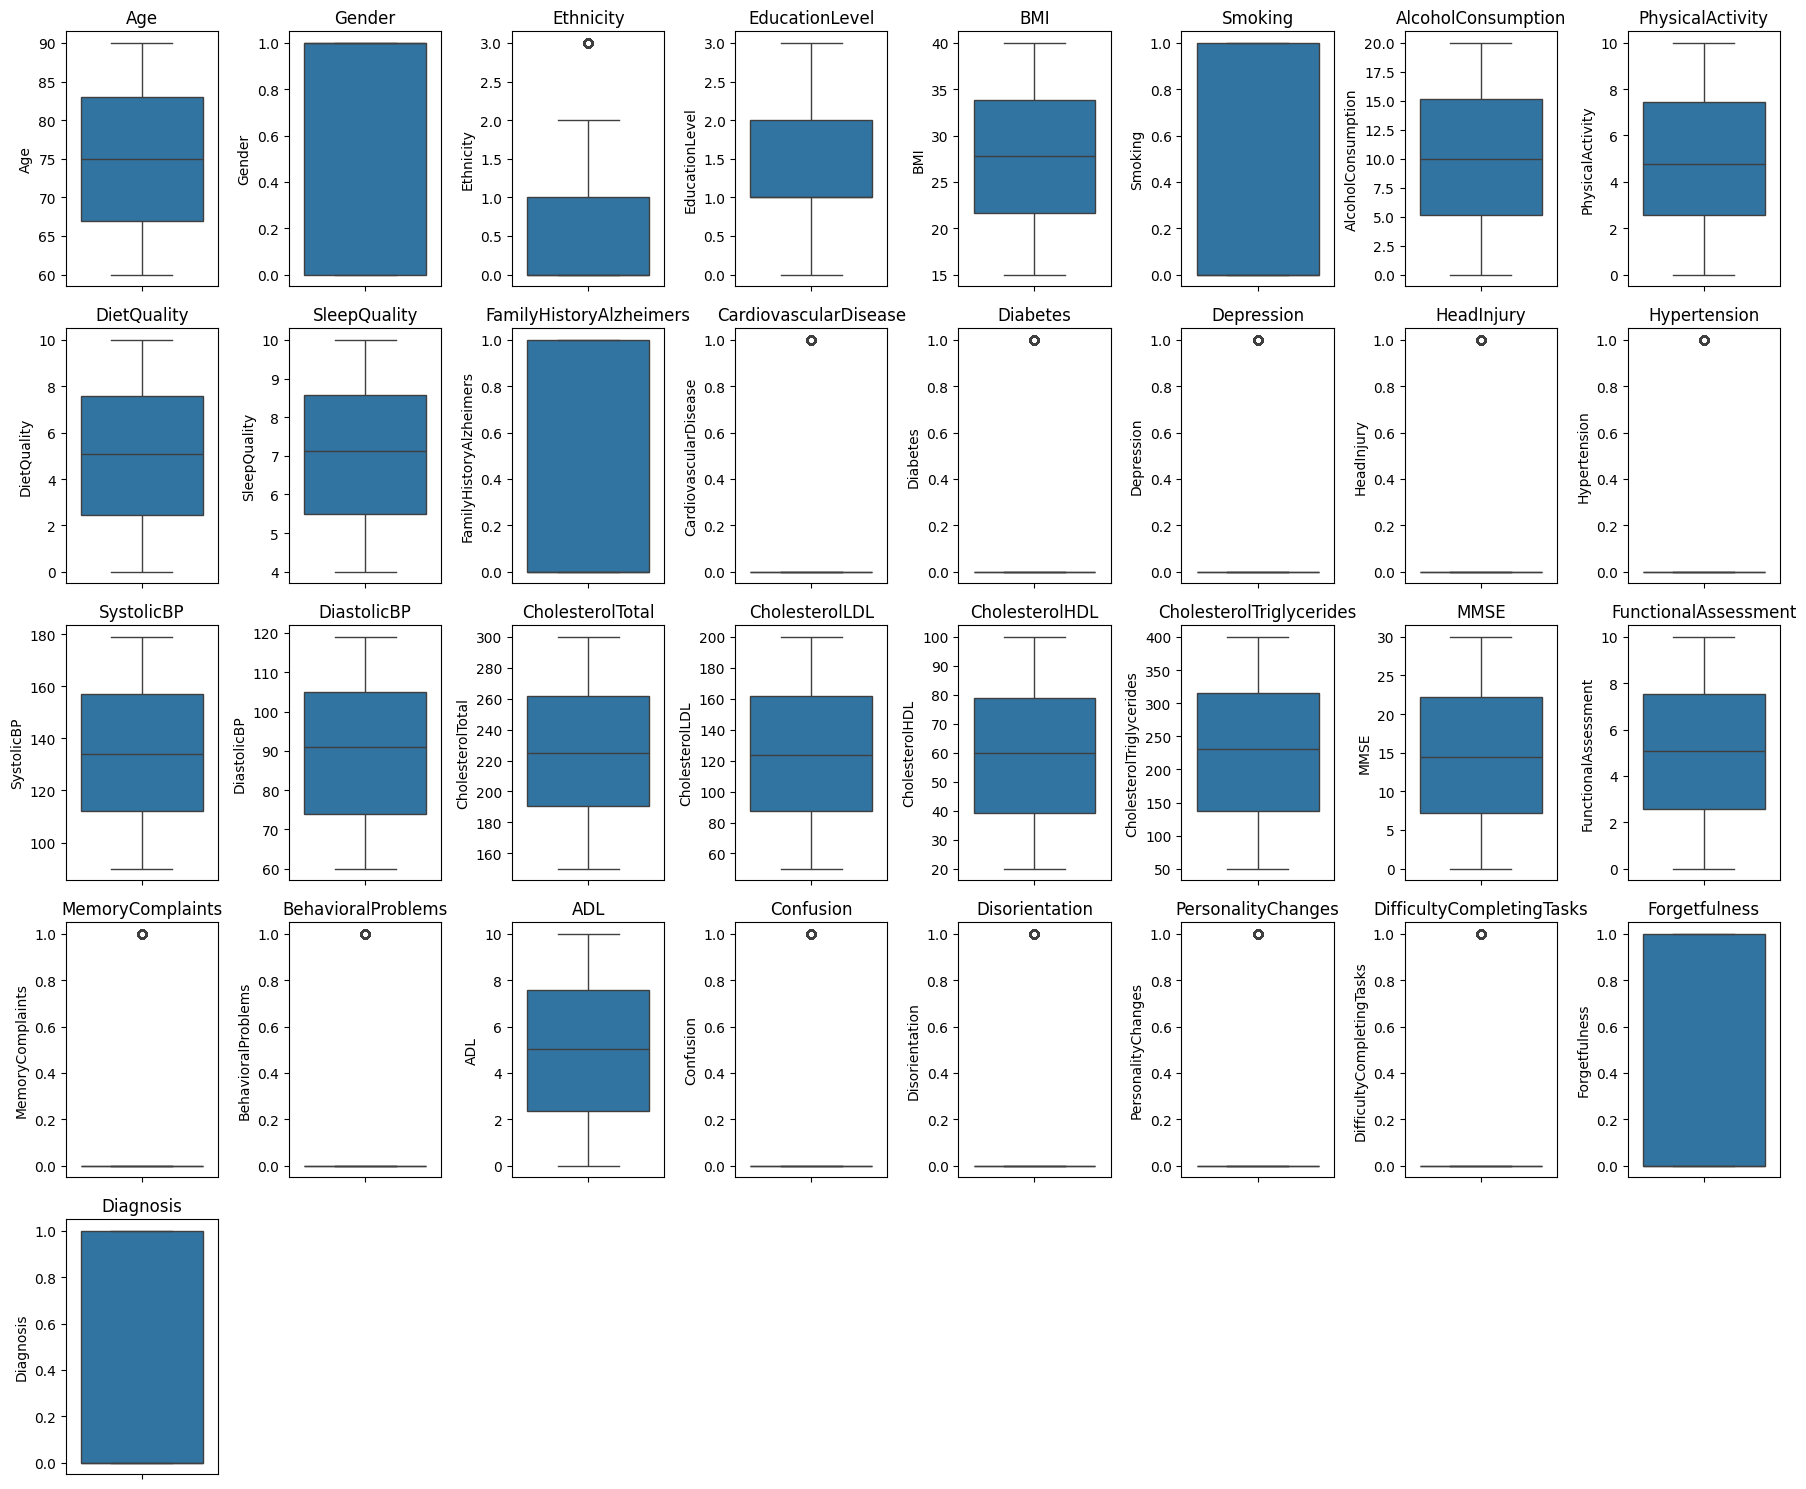

In [12]:
# Crear una figura con múltiples subplots
def plot_boxplots_seaborn(df, cols=4):
    num_columns = len(df.columns)
    num_rows = num_columns // cols + int(num_columns % cols != 0)
    
    fig, axes = plt.subplots(num_rows, cols, figsize=(18, num_rows * 3))
    axes = axes.flatten()
    
    for i, col in enumerate(df.columns):
        sns.boxplot(y=df[col], ax=axes[i])
        axes[i].set_title(col)
    
    for i in range(num_columns, len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

plot_boxplots_seaborn(df, cols=8)

#### Calculo de Outliers a partir de desviacion sobre la media

In [13]:
columns_to_check = [
    'Age','BMI',
    'PhysicalActivity', 'DietQuality',
    'SleepQuality', 'SystolicBP',
    'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
    'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
    'ADL'
]

threshold = 3

outliers = pd.DataFrame(columns=df.columns)

means = df[columns_to_check].mean()
std_devs = df[columns_to_check].std()

# Iterar sobre cada columna y buscar outliers
for col in columns_to_check:
    col_mean = means[col]
    col_std = std_devs[col]
    # Identificar outliers para esta columna
    outlier_mask = (df[col] < col_mean - threshold * col_std) | (df[col] > col_mean + threshold * col_std)
    col_outliers = df.loc[outlier_mask, :]
    # Agregar los outliers al DataFrame de outliers
    outliers = pd.concat([outliers, col_outliers], ignore_index=True)

# Eliminar duplicados
outliers = outliers.drop_duplicates()

# Mostrar los outliers
print("\nOutliers encontrados:")
print(outliers)


Outliers encontrados:
Empty DataFrame
Columns: [Age, Gender, Ethnicity, EducationLevel, BMI, Smoking, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality, FamilyHistoryAlzheimers, CardiovascularDisease, Diabetes, Depression, HeadInjury, Hypertension, SystolicBP, DiastolicBP, CholesterolTotal, CholesterolLDL, CholesterolHDL, CholesterolTriglycerides, MMSE, FunctionalAssessment, MemoryComplaints, BehavioralProblems, ADL, Confusion, Disorientation, PersonalityChanges, DifficultyCompletingTasks, Forgetfulness, Diagnosis]
Index: []

[0 rows x 33 columns]


#### Calculo de Outliers A partir de quantiles

In [14]:
# Calcular los percentiles 25 y 75
Q1 = df[columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Crear un DataFrame vacío para almacenar los outliers
outliers = pd.DataFrame(columns=df.columns)

# Iterar sobre cada columna y buscar outliers
for col in columns_to_check:
    # Identificar outliers para esta columna
    outlier_mask = (df[col] < Q1[col] - 1.5 * IQR[col]) | (df[col] > Q3[col] + 1.5 * IQR[col])
    col_outliers = df.loc[outlier_mask, :]
    # Agregar los outliers al DataFrame de outliers
    outliers = pd.concat([outliers, col_outliers], ignore_index=True)

# Eliminar duplicados
outliers = outliers.drop_duplicates()

# Mostrar los outliers
print("\nOutliers encontrados:")
print(outliers)


Outliers encontrados:
Empty DataFrame
Columns: [Age, Gender, Ethnicity, EducationLevel, BMI, Smoking, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality, FamilyHistoryAlzheimers, CardiovascularDisease, Diabetes, Depression, HeadInjury, Hypertension, SystolicBP, DiastolicBP, CholesterolTotal, CholesterolLDL, CholesterolHDL, CholesterolTriglycerides, MMSE, FunctionalAssessment, MemoryComplaints, BehavioralProblems, ADL, Confusion, Disorientation, PersonalityChanges, DifficultyCompletingTasks, Forgetfulness, Diagnosis]
Index: []

[0 rows x 33 columns]


No se detectan outliers en el dataset

#### Correlation matrix

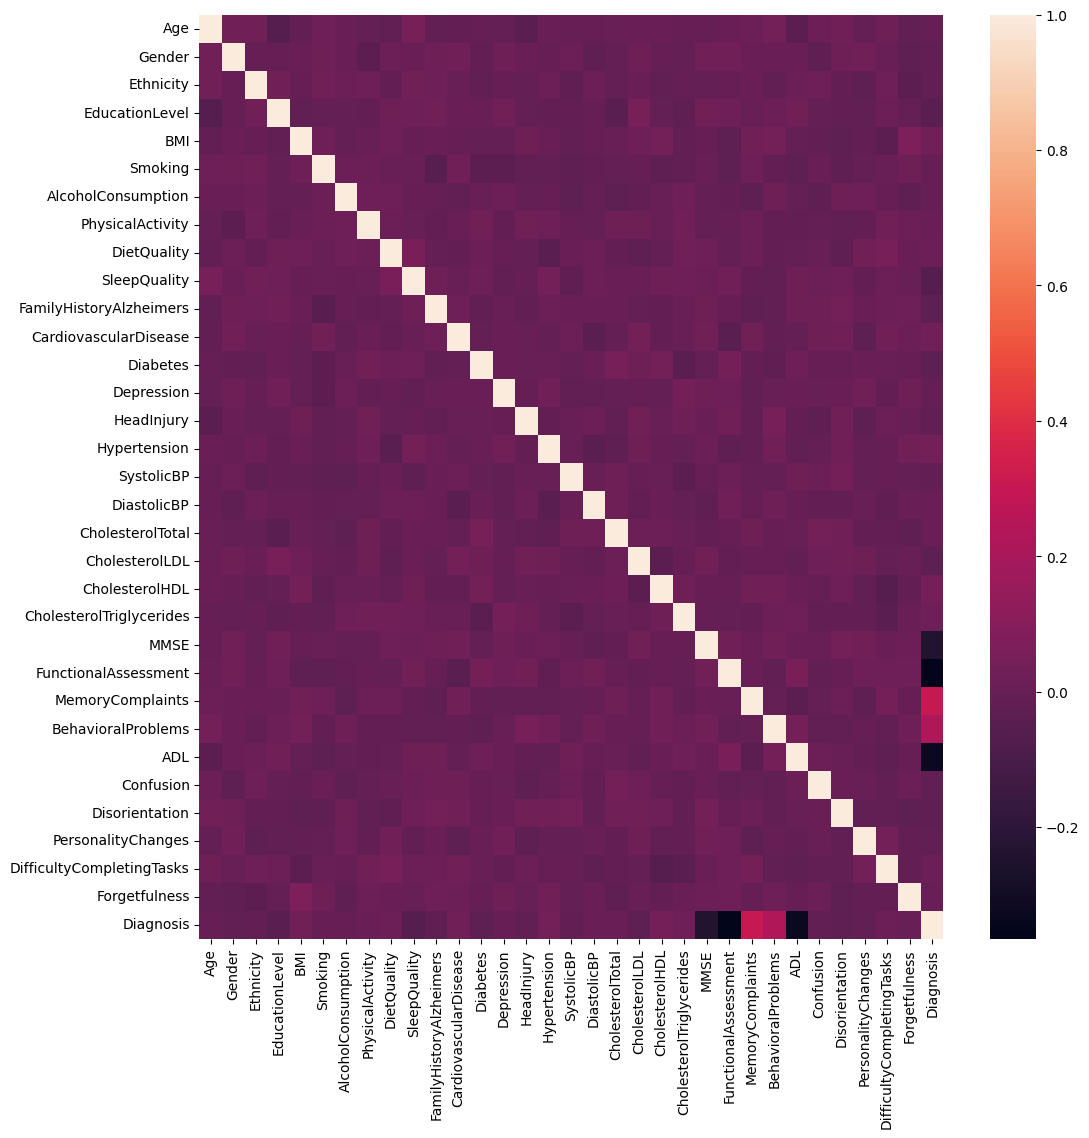

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(numeric_only=True))
plt.show()

#### Pair Plot variables mas significativas

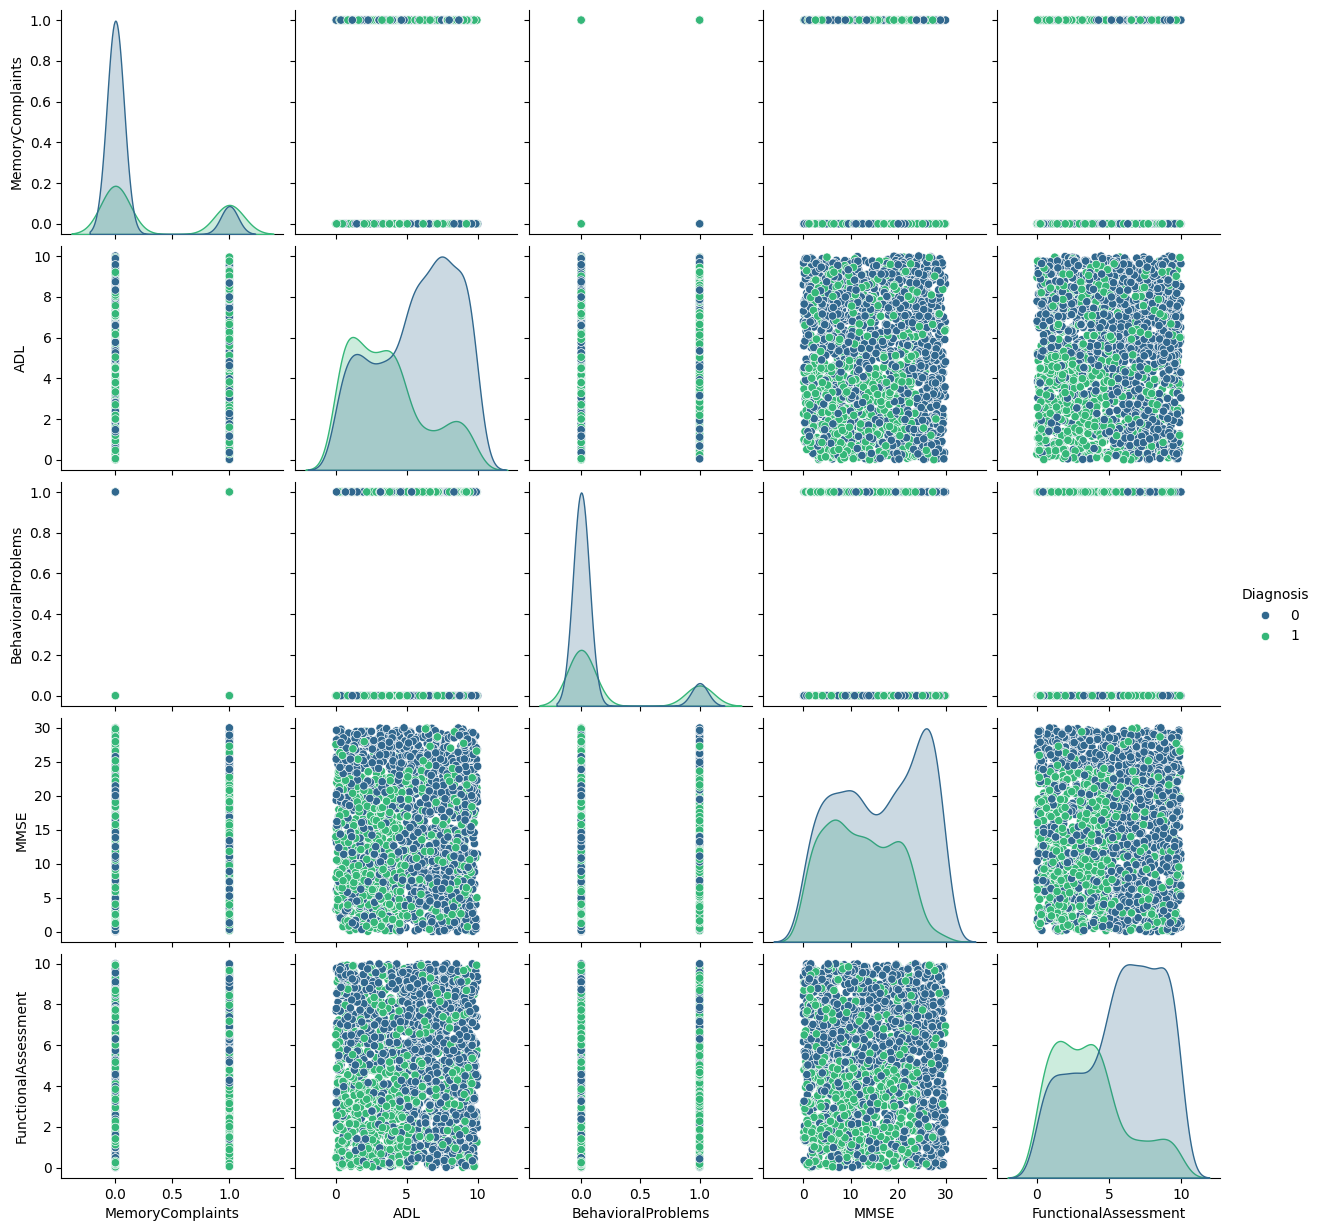

In [16]:
pairplot_vars = [
    "Diagnosis",
    "MemoryComplaints",
    "ADL",
    "BehavioralProblems",
    "MMSE",
    "FunctionalAssessment"
]
sns.pairplot(df[pairplot_vars], hue="Diagnosis", palette="viridis")
plt.show()

#### Evaluación Variable Objetivo

<Axes: xlabel='Diagnosis', ylabel='count'>

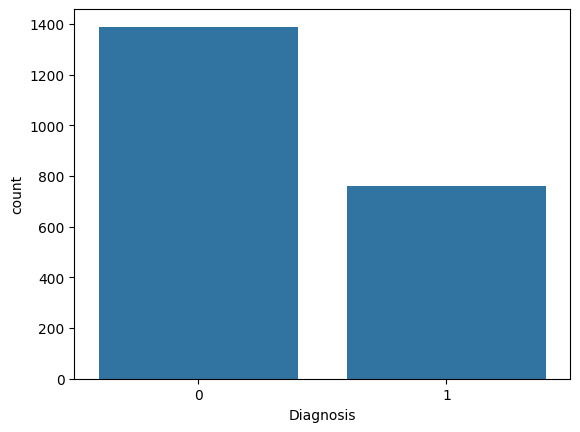

In [17]:
sns.countplot(df,x='Diagnosis')

Detectamos que hay un desequilibrio entre los casos positivos y negativos en el dataset. Vamos a mirarlo en mas detalle.

In [18]:

class_counts = df['Diagnosis'].value_counts()
class_proportions = df['Diagnosis'].value_counts(normalize=True)

print("Conteo de cada clase:")
print(class_counts)

print("\nProporción de cada clase:")
print(class_proportions)

Conteo de cada clase:
Diagnosis
0    1389
1     760
Name: count, dtype: int64

Proporción de cada clase:
Diagnosis
0    0.646347
1    0.353653
Name: proportion, dtype: float64


Calculo del imbalance de la variable objetivo

In [19]:
cm = confusion_matrix(df['Diagnosis'], df['Diagnosis']) 

# Cálculo Gini 
total_samples = cm.sum()
probability_positive = cm[1,1] / total_samples
probability_negative = cm[0,0] / total_samples

gini_index = 1 - (probability_positive**2 + probability_negative**2)
print(f"Índice de Gini: {gini_index:.2f}")

Índice de Gini: 0.46


In [20]:
majority_class_count = class_counts.max()
minority_class_count = class_counts.min()

imbalance_index = majority_class_count / minority_class_count

print(f"Índice de Desequilibrio: {imbalance_index:.2f}")

Índice de Desequilibrio: 1.83


El desequilibrio es moderado, pero lo tendremos en cuenta para balancear los modelos. Alternativamente podemos hacer ingenieria de datos para ajustar el dataset.

#### Analisis de Correlaciones con variable principal

Revisamos las variables que tienen una correlacion con la variable objetivo mayor a 0.2. 

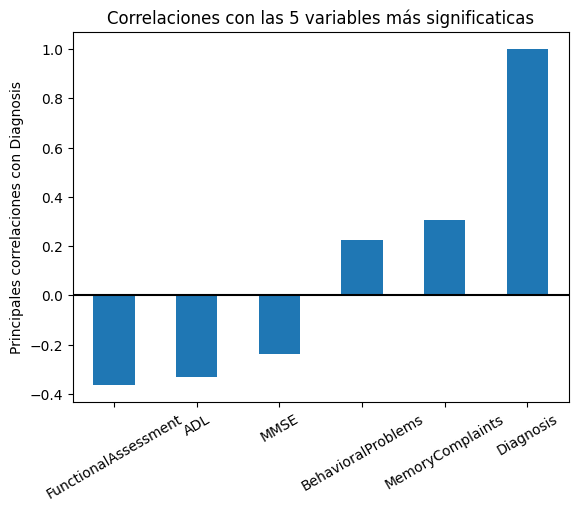

In [21]:
corr_matrix=df.corr()['Diagnosis']
target=0.2
heatcol=df.columns[corr_matrix.abs() > target]
df[heatcol].corr()['Diagnosis'].sort_values().plot(kind='bar')
plt.title('Correlaciones con las 5 variables más significaticas')
plt.axhline(0, color="k")
plt.ylabel('Principales correlaciones con Diagnosis')
plt.xticks( rotation=30)
plt.show()


In [22]:
d_corr = df.corr(numeric_only=True)['Diagnosis'].sort_values(ascending=False)[1:].to_frame()

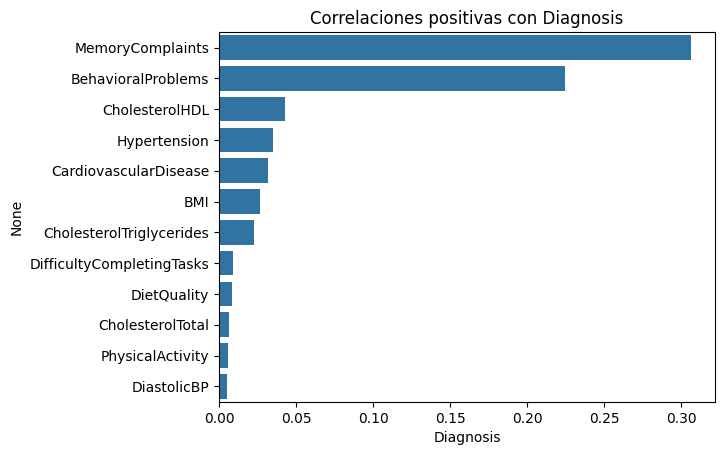

In [23]:
# positive correlations
pos_corrs = d_corr[d_corr['Diagnosis'] >= 0]
sns.barplot(x='Diagnosis', y=pos_corrs.index, data=pos_corrs)
plt.title('Correlaciones positivas con Diagnosis')
plt.show()

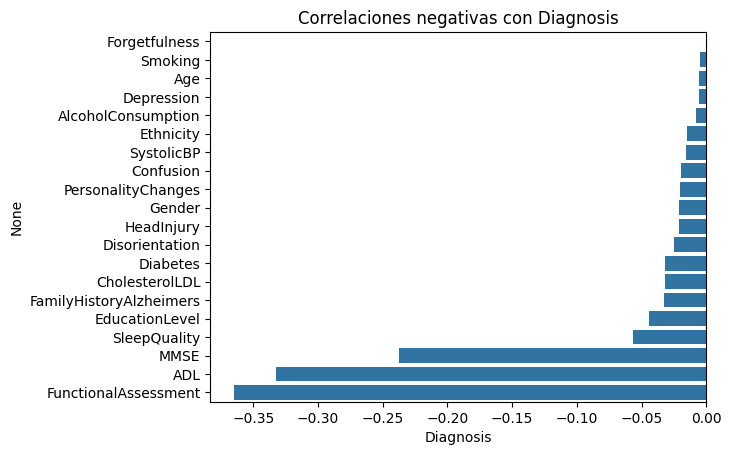

In [24]:
# negative correlations
neg_corrs = d_corr[d_corr['Diagnosis'] < 0]
sns.barplot(x='Diagnosis', y=neg_corrs.index, data=neg_corrs)
plt.title('Correlaciones negativas con Diagnosis')
plt.show()


#### Analizamos las variables categoricas mas correlacionadas en relacion a la variable objetivo.

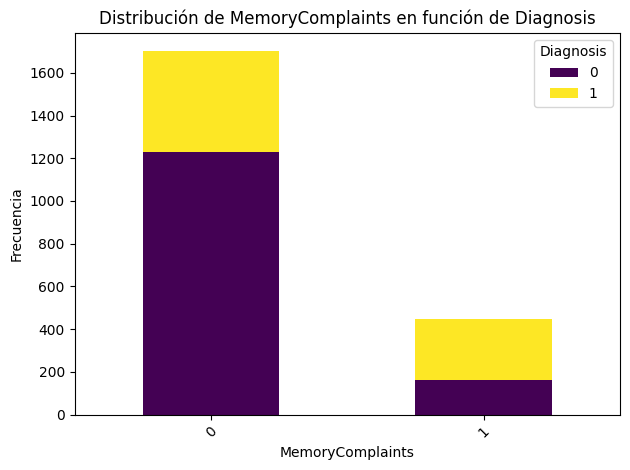

In [25]:
variable_interes = 'MemoryComplaints'  
variable_objetivo = 'Diagnosis'  

distribucion = df.groupby([variable_interes, variable_objetivo]).size().unstack()

distribucion.plot(kind='bar', stacked=True, colormap='viridis')
plt.title(f'Distribución de {variable_interes} en función de {variable_objetivo}')
plt.xlabel(variable_interes)
plt.ylabel('Frecuencia')
plt.legend(title=variable_objetivo)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

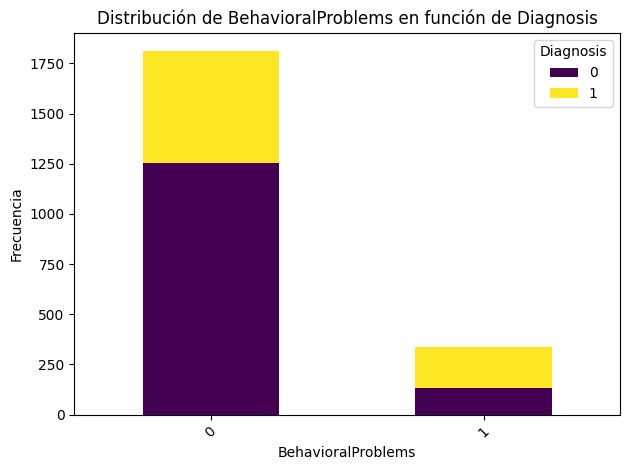

In [26]:
variable_interes = 'BehavioralProblems'  
variable_objetivo = 'Diagnosis'  

distribucion = df.groupby([variable_interes, variable_objetivo]).size().unstack()

distribucion.plot(kind='bar', stacked=True, colormap='viridis')
plt.title(f'Distribución de {variable_interes} en función de {variable_objetivo}')
plt.xlabel(variable_interes)
plt.ylabel('Frecuencia')
plt.legend(title=variable_objetivo)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

La distribución de valores parece ser equilibrada respecto a la variable objetivo.

### Feature Engineering


#### Creamos nuevas variables binarias a partir de las variables categoricas

In [27]:
categorical_columns = ['EducationLevel', 'Ethnicity']
df_clean = pd.get_dummies(df, columns=categorical_columns)
print(df_clean.columns)

Index(['Age', 'Gender', 'BMI', 'Smoking', 'AlcoholConsumption',
       'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'EducationLevel_0', 'EducationLevel_1',
       'EducationLevel_2', 'EducationLevel_3', 'Ethnicity_0', 'Ethnicity_1',
       'Ethnicity_2', 'Ethnicity_3'],
      dtype='object')


Persistimos el nuevo dataset como df_clean

In [28]:
df_clean.to_csv(r'..\DATASET\df_clean.csv', index=False, encoding='utf-8')

#### undersampling RESAMPLE

In [29]:


df_0 = df_clean[df_clean['Diagnosis'] == 0]
df_1 = df_clean[df_clean['Diagnosis'] == 1]
df_0_downsampled = resample(df_0, 
                             replace=False,    
                             n_samples=len(df_1), 
                             random_state=42)  
df_balanced = pd.concat([df_0_downsampled, df_1])

print("\nDistribución de la variable después del RESAMPLE:")
print(df_balanced['Diagnosis'].value_counts())


Distribución de la variable después del RESAMPLE:
Diagnosis
0    760
1    760
Name: count, dtype: int64


Persistimos el nuevo dataset como df_balanced

In [30]:
df_balanced.to_csv(r'..\DATASET\df_balanced.csv', index=False, encoding='utf-8')

#### oversampling SMOTE

In [31]:
X = df_clean.drop(['Diagnosis'], axis=1)  
y = df_clean['Diagnosis']              

smote = SMOTE(random_state=42)

# Aplicar SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Crear un DataFrame balanceado
df_smote = pd.concat([X_resampled, y_resampled], axis=1)

print("Distribución de la variable objetivo antes del oversampling:")
print(y.value_counts())

print("\nDistribución de la variable objetivo después del SMOTE:")
print(y_resampled.value_counts())

Distribución de la variable objetivo antes del oversampling:
Diagnosis
0    1389
1     760
Name: count, dtype: int64

Distribución de la variable objetivo después del SMOTE:
Diagnosis
0    1389
1    1389
Name: count, dtype: int64


Persistimos el nuevo dataset como df_smote

In [32]:
df_smote.to_csv(r'..\DATASET\df_smote.csv', index=False, encoding='utf-8')

### Modelado

Para el analisis inicial, evalaumos los modelos con los distintos datasets (clean, balanced y smote) para determinar cual usaremos en fases posteriores

#### Evaluamos modelos de Classificación con Clean

In [33]:
X = df_clean.drop(['Diagnosis'], axis=1)  
y = df_clean['Diagnosis']              

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

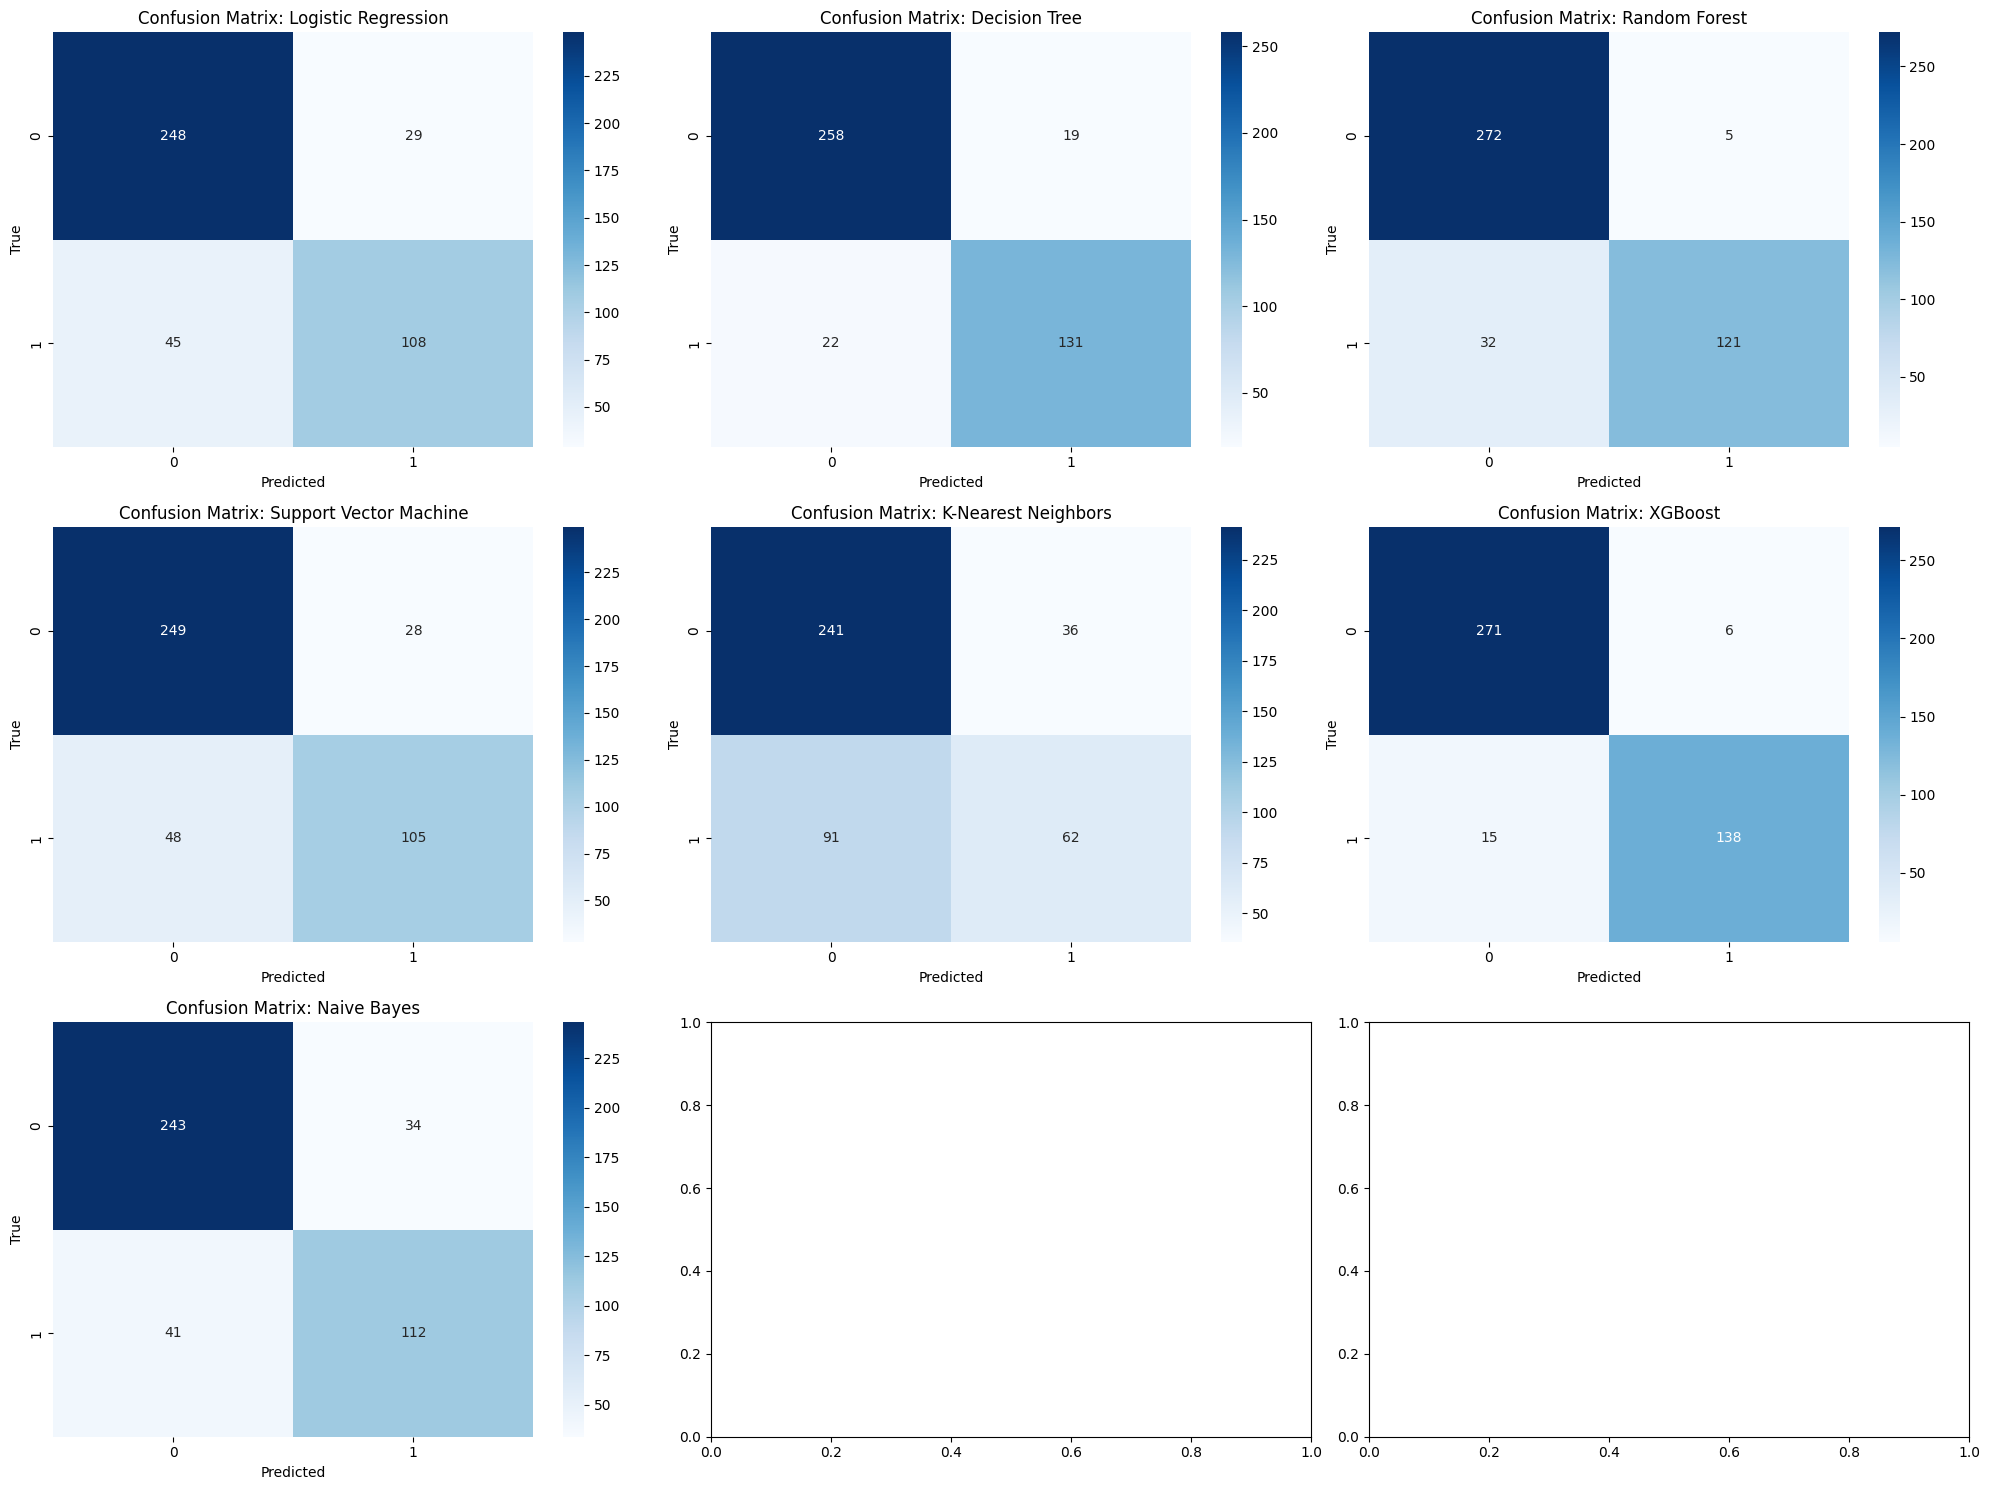

In [35]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'Naive Bayes': GaussianNB()
}

results = []
confusion_matrices = {}

for model_name, model in models.items():
   
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    metrics = {
        'Model': model_name,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Train Balanced Accuracy': balanced_accuracy_score(y_train, y_train_pred),
        'Test Balanced Accuracy': balanced_accuracy_score(y_test, y_test_pred),
        'Train Precision': precision_score(y_train, y_train_pred, average='weighted'),
        'Test Precision': precision_score(y_test, y_test_pred, average='weighted'),
        'Train Recall': recall_score(y_train, y_train_pred, average='weighted'),
        'Test Recall': recall_score(y_test, y_test_pred, average='weighted'),
        'Train F1 Score': f1_score(y_train, y_train_pred, average='weighted'),
        'Test F1 Score': f1_score(y_test, y_test_pred, average='weighted')
    }
    
    results.append(metrics)
    
   
    confusion_matrices[model_name] = confusion_matrix(y_test, y_test_pred)


results_df = pd.DataFrame(results)


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axes = axes.flatten()

for ax, (model_name, cm) in zip(axes, confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix: {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()

In [36]:
results_df

,Model,Train Accuracy,Test Accuracy,Train Balanced Accuracy,Test Balanced Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score
0,Logistic Regression,0.853985,0.827907,0.832898,0.800595,0.852609,0.825745,0.853985,0.827907,0.852820,0.825575
1,Decision Tree,1.000000,0.904651,1.000000,0.893809,1.000000,0.904316,1.000000,0.904651,1.000000,0.904436
2,Random Forest,1.000000,0.913953,1.000000,0.886400,1.000000,0.918071,1.000000,0.913953,1.000000,0.911789
3,Support Vector Machine,0.942990,0.823256,0.928627,0.792596,0.943499,0.820981,0.942990,0.823256,0.942419,0.820155
4,K-Nearest Neighbors,0.822571,0.704651,0.771583,0.637632,0.827314,0.692724,0.822571,0.704651,0.813569,0.685629
5,XGBoost,1.000000,0.951163,1.000000,0.940150,1.000000,0.951388,1.000000,0.951163,1.000000,0.950813
6,Naive Bayes,0.820826,0.825581,0.798291,0.804641,0.819205,0.824141,0.820826,0.825581,0.819748,0.824628


#### Evaluamos modelos de Classificación con undersampling

In [37]:
X = df_balanced.drop(['Diagnosis'], axis=1)  
y = df_balanced['Diagnosis']            

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

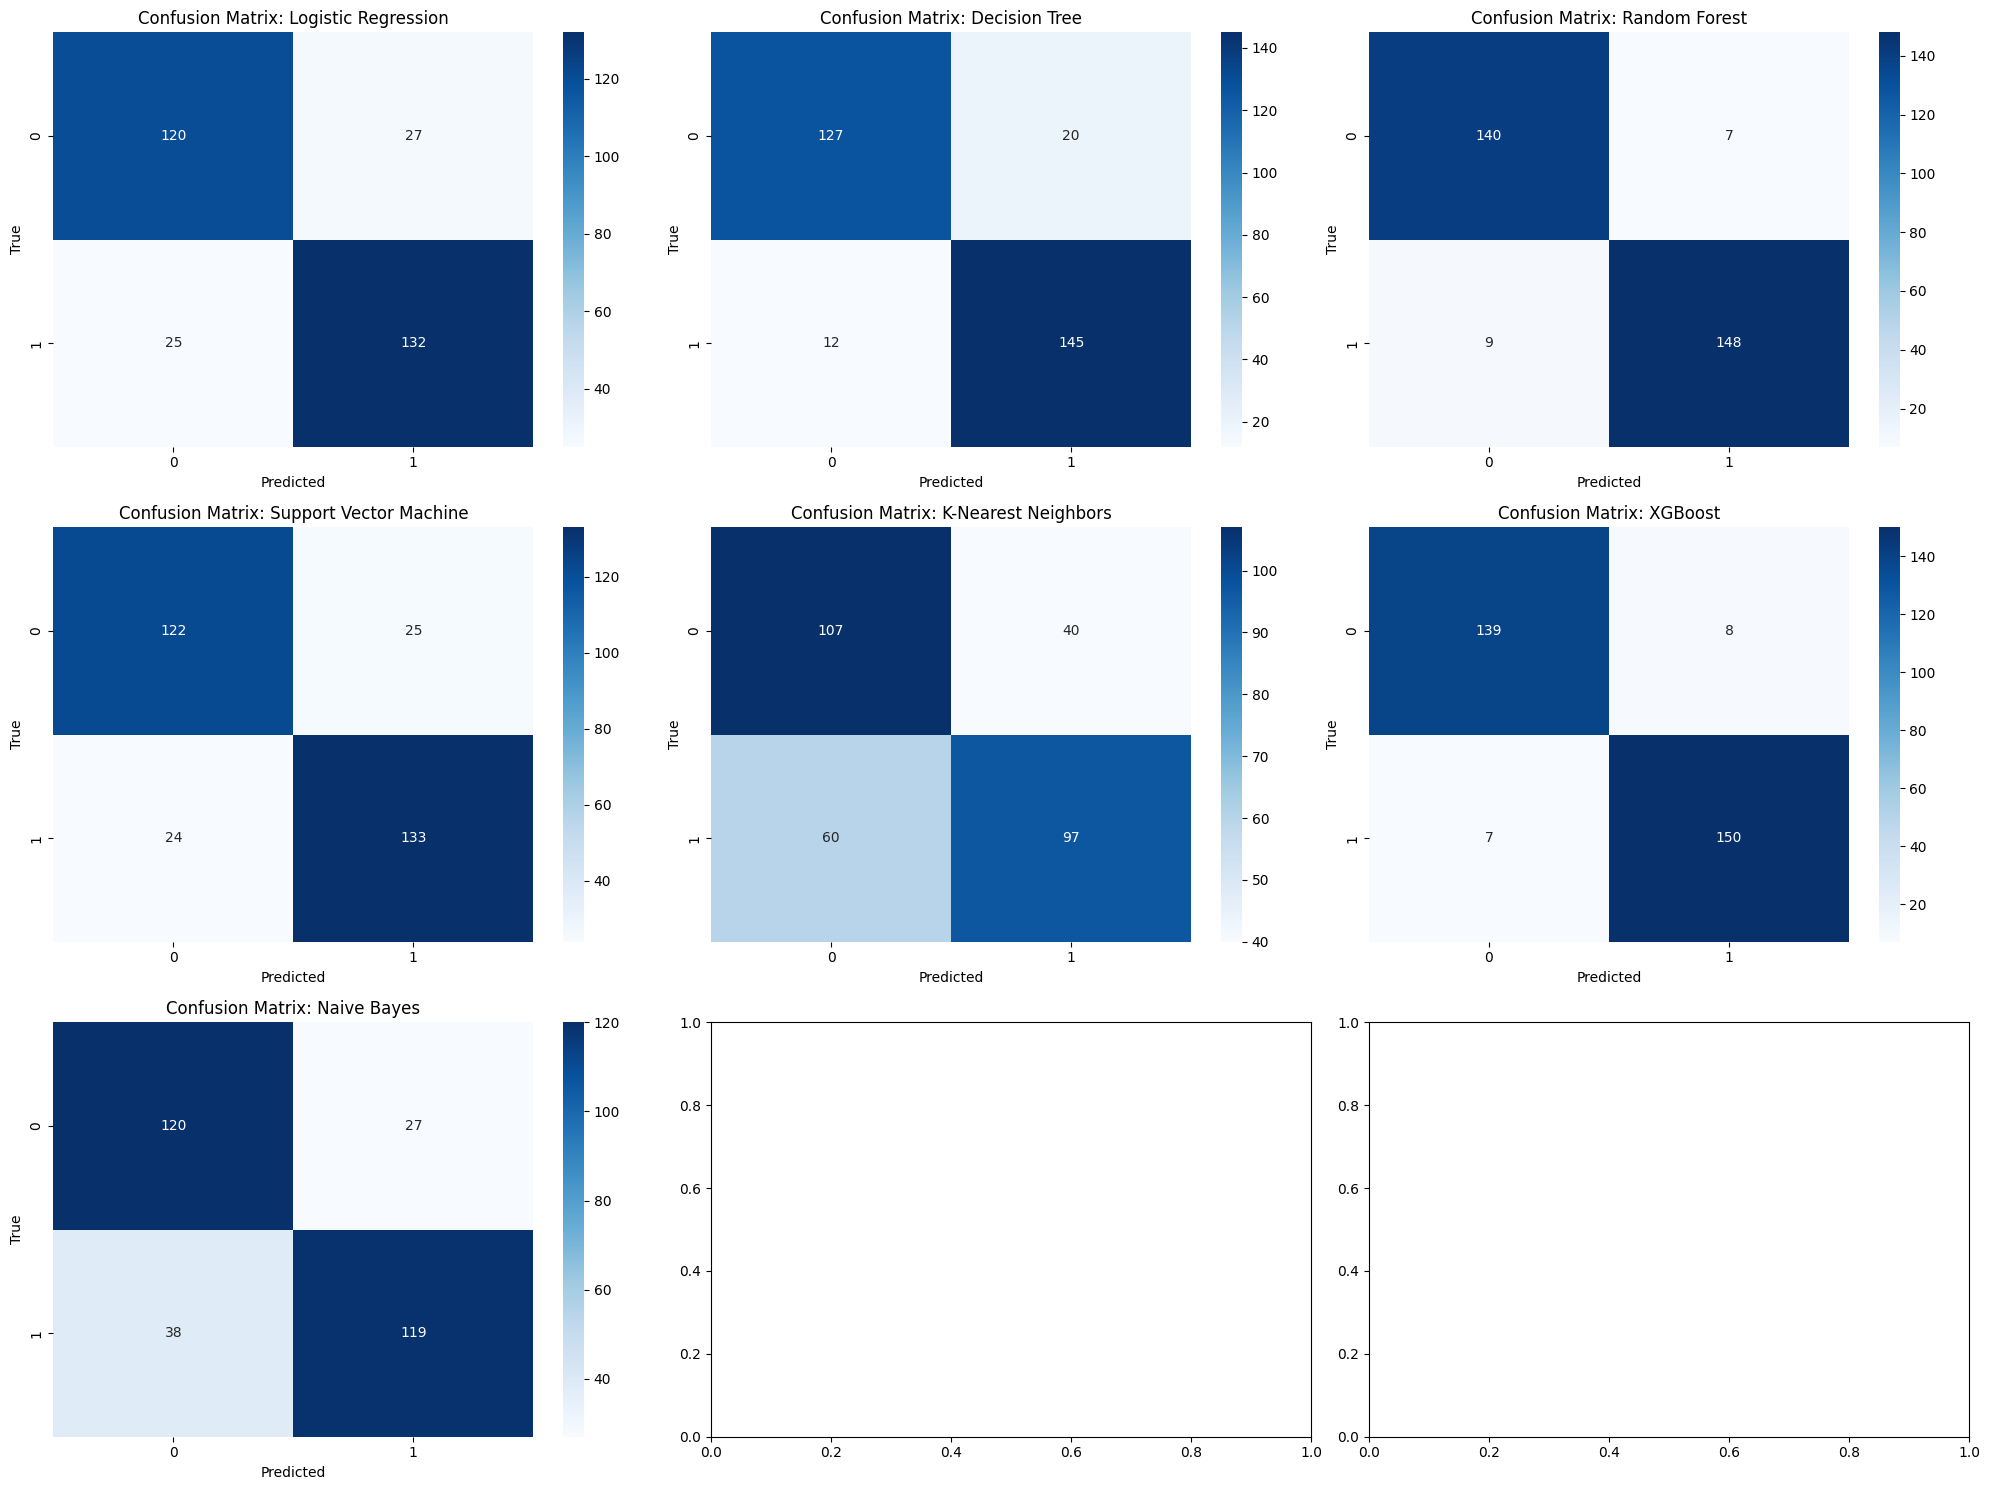

In [39]:

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'Naive Bayes': GaussianNB()
}
results = []
confusion_matrices = {}

for model_name, model in models.items():

    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    metrics = {
        'Model': model_name,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Train Balanced Accuracy': balanced_accuracy_score(y_train, y_train_pred),
        'Test Balanced Accuracy': balanced_accuracy_score(y_test, y_test_pred),
        'Train Precision': precision_score(y_train, y_train_pred, average='weighted'),
        'Test Precision': precision_score(y_test, y_test_pred, average='weighted'),
        'Train Recall': recall_score(y_train, y_train_pred, average='weighted'),
        'Test Recall': recall_score(y_test, y_test_pred, average='weighted'),
        'Train F1 Score': f1_score(y_train, y_train_pred, average='weighted'),
        'Test F1 Score': f1_score(y_test, y_test_pred, average='weighted')
    }
    
    results.append(metrics)

    confusion_matrices[model_name] = confusion_matrix(y_test, y_test_pred)


results_df = pd.DataFrame(results)


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axes = axes.flatten()

for ax, (model_name, cm) in zip(axes, confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix: {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()

In [40]:
results_df

,Model,Train Accuracy,Test Accuracy,Train Balanced Accuracy,Test Balanced Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score
0,Logistic Regression,0.837171,0.828947,0.837133,0.828545,0.837177,0.828930,0.837171,0.828947,0.837165,0.828903
1,Decision Tree,1.000000,0.894737,1.000000,0.893756,1.000000,0.895655,1.000000,0.894737,1.000000,0.894572
2,Random Forest,1.000000,0.947368,1.000000,0.947528,1.000000,0.947469,1.000000,0.947368,1.000000,0.947378
3,Support Vector Machine,0.942434,0.838816,0.942376,0.838533,0.942505,0.838796,0.942434,0.838816,0.942429,0.838797
4,K-Nearest Neighbors,0.812500,0.671053,0.812271,0.672863,0.813287,0.675481,0.812500,0.671053,0.812329,0.670340
5,XGBoost,1.000000,0.950658,1.000000,0.950496,1.000000,0.950667,1.000000,0.950658,1.000000,0.950652
6,Naive Bayes,0.805099,0.786184,0.805200,0.787144,0.805382,0.788195,0.805099,0.786184,0.805083,0.786159


#### Evaluamos modelos de Classificación con Oversampling 

In [41]:
X = df_smote.drop(['Diagnosis'], axis=1) 
y = df_smote['Diagnosis']              
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

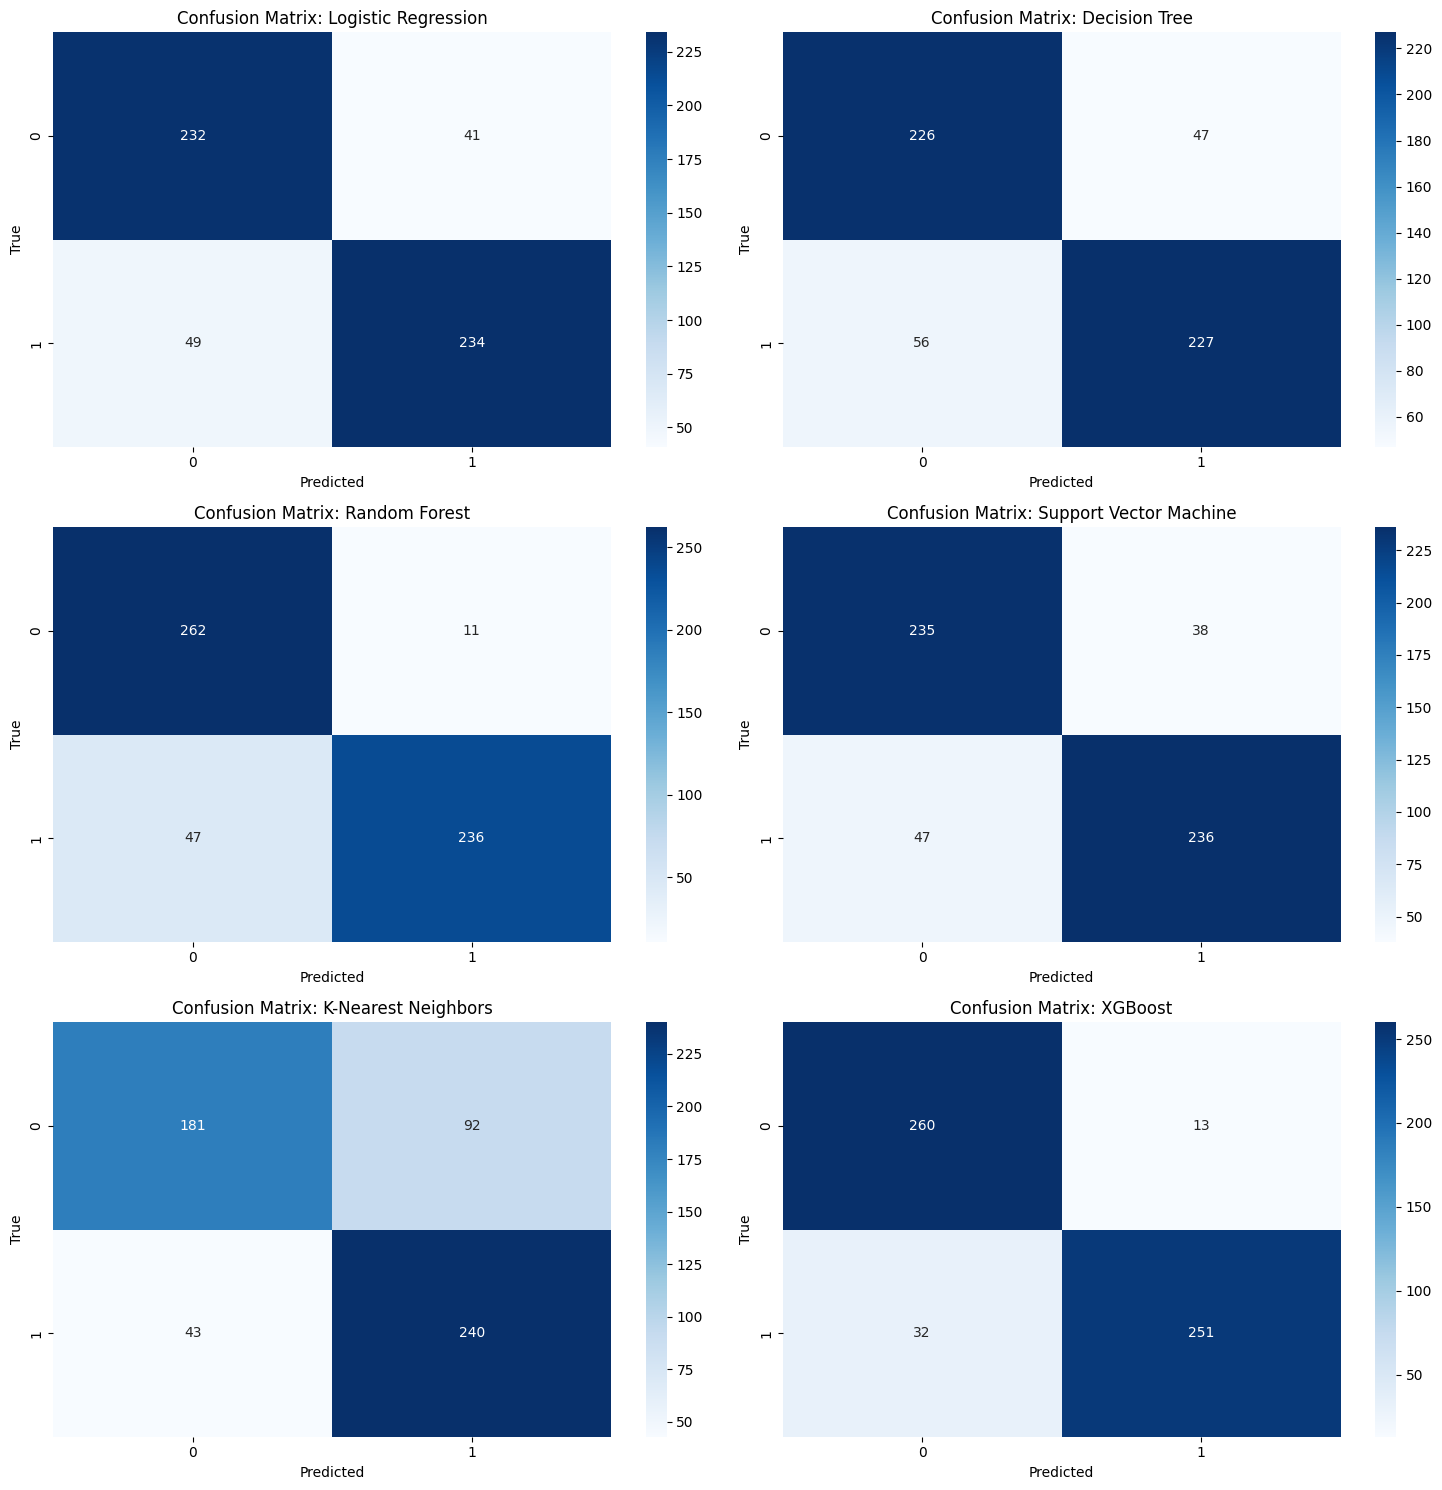

In [43]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'Naive Bayes': GaussianNB()
}

results = []
confusion_matrices = {}

for model_name, model in models.items():

    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    metrics = {
        'Model': model_name,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Train Balanced Accuracy': balanced_accuracy_score(y_train, y_train_pred),
        'Test Balanced Accuracy': balanced_accuracy_score(y_test, y_test_pred),
        'Train Precision': precision_score(y_train, y_train_pred, average='weighted'),
        'Test Precision': precision_score(y_test, y_test_pred, average='weighted'),
        'Train Recall': recall_score(y_train, y_train_pred, average='weighted'),
        'Test Recall': recall_score(y_test, y_test_pred, average='weighted'),
        'Train F1 Score': f1_score(y_train, y_train_pred, average='weighted'),
        'Test F1 Score': f1_score(y_test, y_test_pred, average='weighted')
    }
    
    results.append(metrics)
    
    confusion_matrices[model_name] = confusion_matrix(y_test, y_test_pred)

results_df = pd.DataFrame(results)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()

for ax, (model_name, cm) in zip(axes, confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix: {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()

In [44]:
results_df

,Model,Train Accuracy,Test Accuracy,Train Balanced Accuracy,Test Balanced Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score
0,Logistic Regression,0.866787,0.838129,0.866695,0.838336,0.867339,0.838493,0.866787,0.838129,0.866723,0.838138
1,Decision Tree,1.000000,0.814748,1.000000,0.814979,1.000000,0.815186,1.000000,0.814748,1.000000,0.814754
2,Random Forest,1.000000,0.895683,1.000000,0.896815,1.000000,0.902648,1.000000,0.895683,1.000000,0.895367
3,Support Vector Machine,0.954995,0.847122,0.954950,0.847364,0.955170,0.847575,0.954995,0.847122,0.954989,0.847127
4,K-Nearest Neighbors,0.855986,0.757194,0.856246,0.755530,0.860999,0.764698,0.855986,0.757194,0.855529,0.754898
5,XGBoost,1.000000,0.919065,1.000000,0.919653,1.000000,0.921127,1.000000,0.919065,1.000000,0.919020
6,Naive Bayes,0.783978,0.787770,0.783970,0.787701,0.783978,0.787770,0.783978,0.787770,0.783977,0.787770


Concluimos que el dataset con Oversampling se comporta peor en todos los modelos, y por tanto lo descartamos.

#### Obtener Importancia variables Random Forest

In [45]:
df_balanced = pd.read_csv(r'..\DATASET\df_balanced.csv') 

In [46]:
X = df_balanced.drop(['Diagnosis'], axis=1) 
y = df_balanced['Diagnosis']            
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       147
           1       0.94      0.94      0.94       157

    accuracy                           0.94       304
   macro avg       0.94      0.94      0.94       304
weighted avg       0.94      0.94      0.94       304

Confusion Matrix:
 [[138   9]
 [  9 148]]


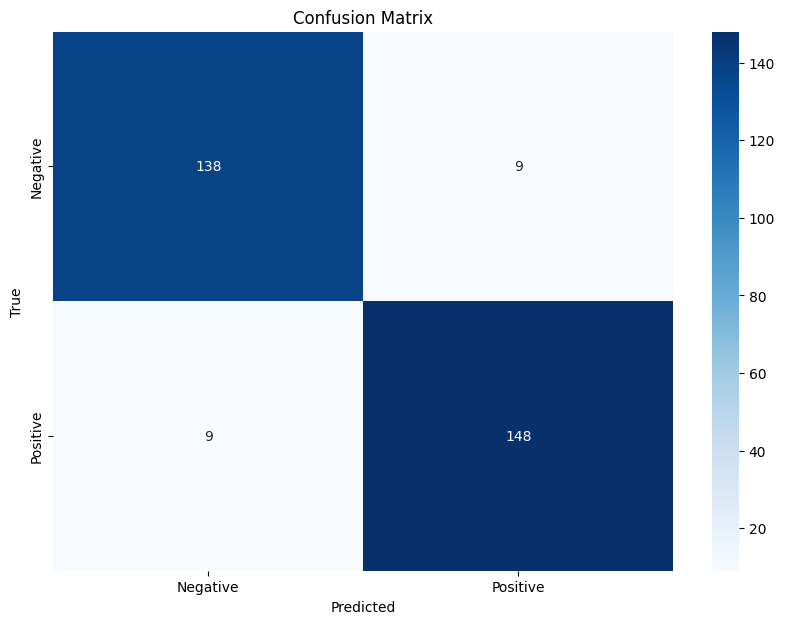

Feature 10 ranking:
1. feature FunctionalAssessment (0.18769562613192264)
2. feature ADL (0.14536870757246198)
3. feature MMSE (0.12204297504050049)
4. feature MemoryComplaints (0.07771996146589977)
5. feature BehavioralProblems (0.051662857316909776)
6. feature CholesterolTriglycerides (0.03226617476454007)
7. feature DietQuality (0.03124676855445735)
8. feature BMI (0.031112837218999972)
9. feature CholesterolHDL (0.03060864686862981)
10. feature AlcoholConsumption (0.02898982791450765)
Feature 5 ranking:
1. feature FunctionalAssessment (0.18769562613192264)
2. feature ADL (0.14536870757246198)
3. feature MMSE (0.12204297504050049)
4. feature MemoryComplaints (0.07771996146589977)
5. feature BehavioralProblems (0.051662857316909776)


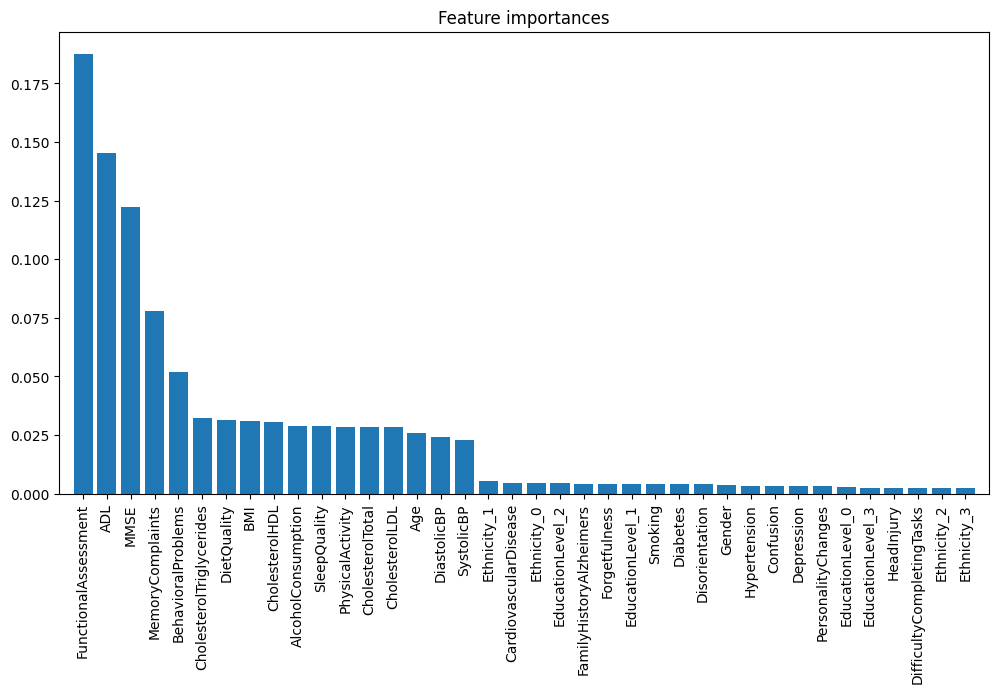

In [48]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Mostrar las 10 variables más importantes
print("Feature 10 ranking:")
top_10features = []
for f in range(10):
    print(f"{f + 1}. feature {X.columns[indices[f]]} ({importances[indices[f]]})")
    top_10features.append(X.columns[indices[f]])
# Mostrar las 5 variables más importantes
print("Feature 5 ranking:")
top_5features = []
for f in range(5):
    print(f"{f + 1}. feature {X.columns[indices[f]]} ({importances[indices[f]]})")
    top_5features.append(X.columns[indices[f]])

# Visualizar la importancia de las características
plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


#### Persistimos el dataset con las top 10/5 variables

In [49]:
# Crear un nuevo DataFrame con las 10 variables más importantes y la variable objetivo
selected_columns = top_10features + ['Diagnosis']
df_balanced_top10_RF = df_balanced[selected_columns]

df_balanced_top10_RF.to_csv(r'..\DATASET\df_balanced_top10_RF.csv', index=False, encoding='utf-8')

In [50]:
# Crear un nuevo DataFrame con las 5 variables más importantes y la variable objetivo
selected_columns = top_5features + ['Diagnosis']
df_balanced_top5_RF = df_balanced[selected_columns]

df_balanced_top5_RF.to_csv(r'..\DATASET\df_balanced_top5_RF.csv', index=False, encoding='utf-8')

### Ajustamos los Hiperparametros de random Forest

In [51]:
df = pd.read_csv(r'..\DATASET\df_balanced_top5_RF.csv')
X = df.drop(['Diagnosis'], axis=1)  
y = df['Diagnosis']              
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
param_dist = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

rf_clf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_dist, 
                                    n_iter=300, scoring='recall', cv=5, 
                                    n_jobs=-1, verbose=1, random_state=42)

random_search.fit(X_train, y_train)

print("Mejores Parámetros:", random_search.best_params_)
print("Mejor Score:", random_search.best_score_)

best_rf_clf = random_search.best_estimator_
y_pred = best_rf_clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


C:\Users\Onofre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores Parámetros: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini', 'bootstrap': False}
Mejor Score: 0.9220661157024793
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       147
           1       0.96      0.95      0.95       157

    accuracy                           0.95       304
   macro avg       0.95      0.95      0.95       304
weighted avg       0.95      0.95      0.95       304

Confusion Matrix:
 [[140   7]
 [  8 149]]


### Testeamos el modelo Random Forest y Random Forest con hiperparametros con todos los datasets

In [53]:
def evaluate_models_on_datasets(models, datasets, target_column='Diagnosis'):

    metrics_list = []

    for model_name, model in models.items():
        for dataset_name, df in datasets.items():
            print(f"Evaluando el modelo {model_name} en el dataset {dataset_name}")
            
            # Separar características y variable objetivo
            X = df.drop([target_column], axis=1)
            y = df[target_column]
            
            # Dividir el DataFrame en conjuntos de entrenamiento y prueba
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            # Entrenar el modelo
            model.fit(X_train, y_train)
            
            # Realizar predicciones
            y_pred_train = model.predict(X_train)
            y_pred_test = model.predict(X_test)
            
            # Calcular métricas para el conjunto de entrenamiento
            train_metrics = {
                'Model': model_name,
                'Dataset': dataset_name,
                'Train Accuracy': accuracy_score(y_train, y_pred_train),
                'Train Balanced Accuracy': balanced_accuracy_score(y_train, y_pred_train),
                'Train Precision': precision_score(y_train, y_pred_train, average='weighted'),
                'Train Recall': recall_score(y_train, y_pred_train, average='weighted'),
                'Train F1 Score': f1_score(y_train, y_pred_train, average='weighted')
            }
            
            # Calcular métricas para el conjunto de prueba
            test_metrics = {
                'Test Accuracy': accuracy_score(y_test, y_pred_test),
                'Test Balanced Accuracy': balanced_accuracy_score(y_test, y_pred_test),
                'Test Precision': precision_score(y_test, y_pred_test, average='weighted'),
                'Test Recall': recall_score(y_test, y_pred_test, average='weighted'),
                'Test F1 Score': f1_score(y_test, y_pred_test, average='weighted')
            }
            
            # Combinar métricas de entrenamiento y prueba
            combined_metrics = {**train_metrics, **test_metrics}
            
            # Añadir al listado de métricas
            metrics_list.append(combined_metrics)
    
    df_metrics_rf = pd.DataFrame(metrics_list)

    # Reorganizar las columnas
    df_metrics_rf = df_metrics_rf[[
        'Model', 'Dataset', 'Train Accuracy', 'Test Accuracy',
        'Train Balanced Accuracy', 'Test Balanced Accuracy',
        'Train Precision', 'Test Precision', 'Train Recall', 'Test Recall',
        'Train F1 Score', 'Test F1 Score'
    ]]

    return df_metrics_rf

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Random Forest_hiper': RandomForestClassifier(bootstrap=False, max_depth=10, max_features="log2", min_samples_leaf=2, min_samples_split=2, n_estimators=500, criterion='gini', random_state=42)
}

# Definir los datasets
datasets = {
    'clean': df_clean,
    'balanced': df_balanced,
    'balanced_TOP10_RF': df_balanced_top10_RF,
    'balanced_TOP5_RF': df_balanced_top5_RF
}

# Evaluar los modelos en los diferentes datasets
df_metrics_rf = evaluate_models_on_datasets(models, datasets)

# Mostrar las métricas recopiladas
print(df_metrics_rf)


Evaluando el modelo Random Forest en el dataset clean
Evaluando el modelo Random Forest en el dataset balanced
Evaluando el modelo Random Forest en el dataset balanced_TOP10_RF
Evaluando el modelo Random Forest en el dataset balanced_TOP5_RF
Evaluando el modelo Random Forest_hiper en el dataset clean
Evaluando el modelo Random Forest_hiper en el dataset balanced
Evaluando el modelo Random Forest_hiper en el dataset balanced_TOP10_RF
Evaluando el modelo Random Forest_hiper en el dataset balanced_TOP5_RF
                 Model            Dataset  Train Accuracy  Test Accuracy  \
0        Random Forest              clean        1.000000       0.920930   
1        Random Forest           balanced        1.000000       0.940789   
2        Random Forest  balanced_TOP10_RF        0.999178       0.950658   
3        Random Forest   balanced_TOP5_RF        0.999178       0.953947   
4  Random Forest_hiper              clean        0.984293       0.925581   
5  Random Forest_hiper           bal

In [54]:
df_metrics_rf

,Model,Dataset,Train Accuracy,Test Accuracy,Train Balanced Accuracy,Test Balanced Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score
0,Random Forest,clean,1.000000,0.920930,1.000000,0.896203,1.000000,0.924144,1.000000,0.920930,1.000000,0.919207
1,Random Forest,balanced,1.000000,0.940789,1.000000,0.940725,1.000000,0.940789,1.000000,0.940789,1.000000,0.940789
2,Random Forest,balanced_TOP10_RF,0.999178,0.950658,0.999184,0.950713,0.999179,0.950688,0.999178,0.950658,0.999178,0.950663
3,Random Forest,balanced_TOP5_RF,0.999178,0.953947,0.999184,0.954331,0.999179,0.954302,0.999178,0.953947,0.999178,0.953959
4,Random Forest_hiper,clean,0.984293,0.925581,0.979256,0.902739,0.984443,0.928249,0.984293,0.925581,0.984235,0.924120
5,Random Forest_hiper,balanced,0.991776,0.944079,0.991735,0.944127,0.991824,0.944110,0.991776,0.944079,0.991776,0.944084
6,Random Forest_hiper,balanced_TOP10_RF,0.986842,0.947368,0.986774,0.947311,0.986972,0.947368,0.986842,0.947368,0.986840,0.947368
7,Random Forest_hiper,balanced_TOP5_RF,0.975329,0.950658,0.975219,0.950713,0.975653,0.950688,0.975329,0.950658,0.975322,0.950663


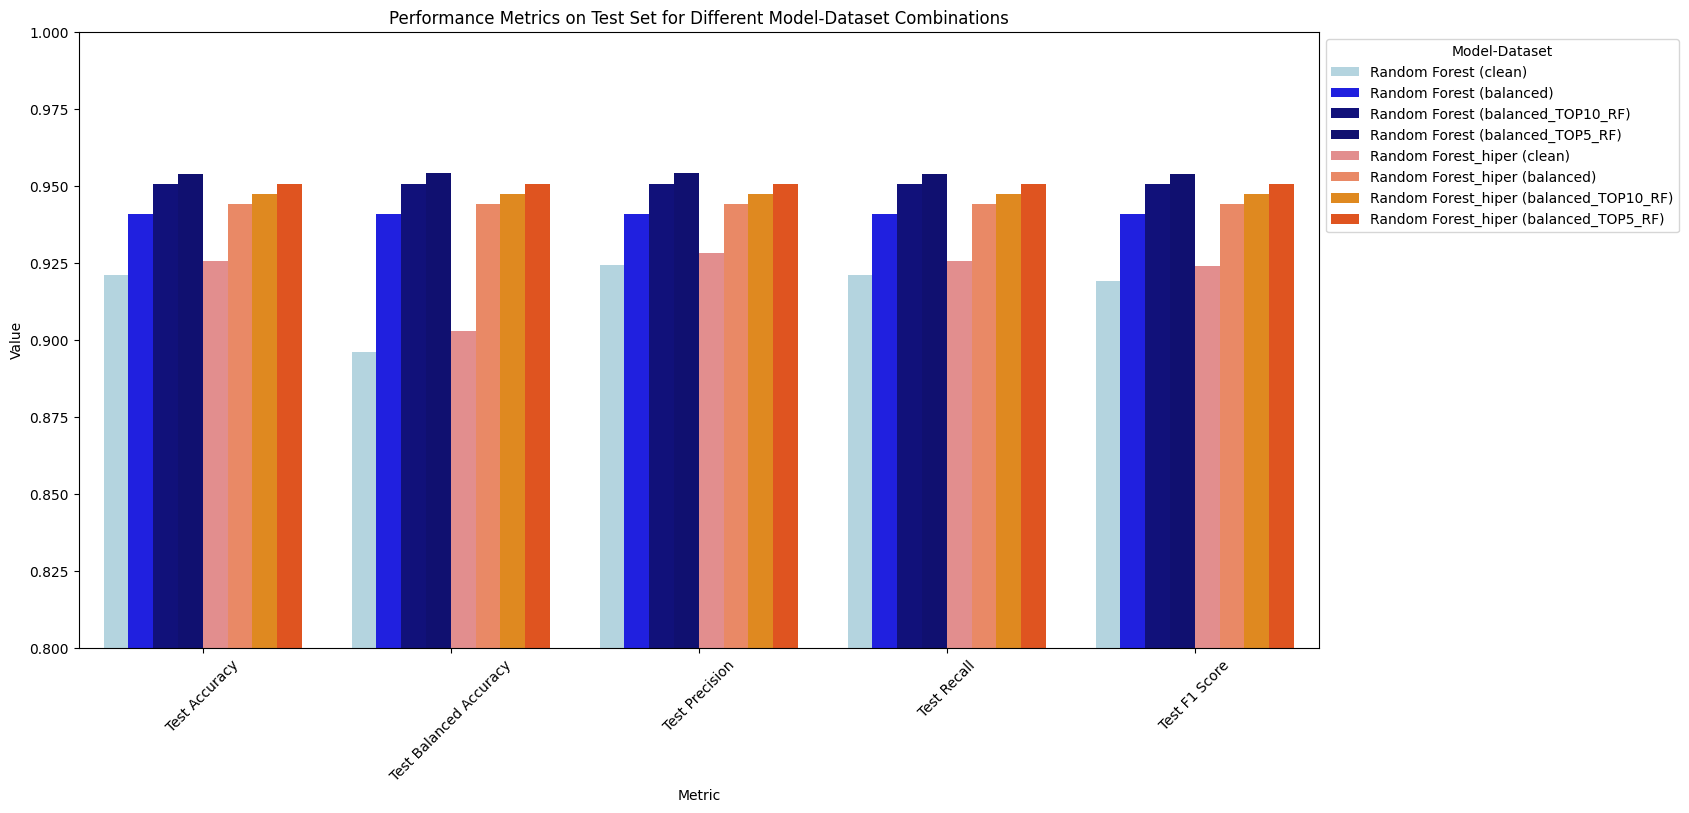

In [55]:
# Reformatear el DataFrame para la gráfica
df_melted = df_metrics_rf.melt(id_vars=['Model', 'Dataset'],
                               value_vars=['Test Accuracy', 'Test Balanced Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score'],
                               var_name='Metric', value_name='Value')

# Crear una nueva columna para combinar Modelo y Dataset
df_melted['Model_Dataset'] = df_melted['Model'] + ' (' + df_melted['Dataset'] + ')'

# Definir una paleta de colores personalizada
palette = {
    'Random Forest (clean)': 'lightblue',
    'Random Forest (balanced)': 'blue',
    'Random Forest (balanced_TOP10_RF)': 'darkblue',
    'Random Forest (balanced_TOP5_RF)': 'navy',
    'Random Forest_hiper (clean)': 'lightcoral',
    'Random Forest_hiper (balanced)': 'coral',
    'Random Forest_hiper (balanced_TOP10_RF)': 'darkorange',
    'Random Forest_hiper (balanced_TOP5_RF)': 'orangered'
}

# Crear la gráfica de barras
plt.figure(figsize=(16, 8))
sns.barplot(data=df_melted, x='Metric', y='Value', hue='Model_Dataset', errorbar=None, palette=palette)

# Ajustar los límites del eje Y
plt.ylim(0.80, 1.00)

# Agregar etiquetas y título
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Performance Metrics on Test Set for Different Model-Dataset Combinations')

# Mostrar la gráfica
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Model-Dataset')
plt.xticks(rotation=45)
plt.show()

## XGBOOST GENERAL

In [56]:
df_balanced = pd.read_csv(r'..\DATASET\df_balanced.csv') 

In [57]:
X = df_balanced.drop(['Diagnosis'], axis=1)  
y = df_balanced['Diagnosis']             
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       147
           1       0.95      0.96      0.95       157

    accuracy                           0.95       304
   macro avg       0.95      0.95      0.95       304
weighted avg       0.95      0.95      0.95       304

Confusion Matrix:
 [[139   8]
 [  7 150]]


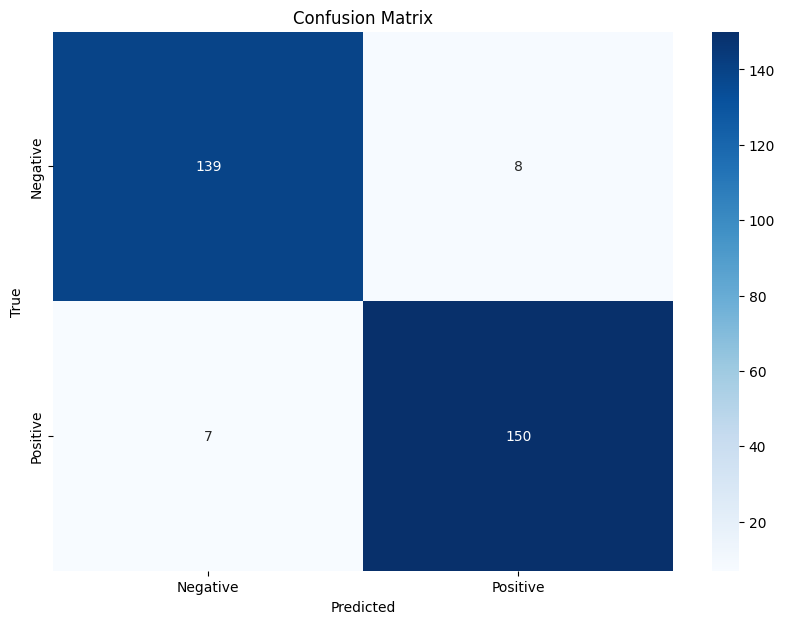

Feature 10 ranking:
1. feature MemoryComplaints (0.15688593685626984)
2. feature BehavioralProblems (0.15073250234127045)
3. feature FunctionalAssessment (0.10666026920080185)
4. feature MMSE (0.09878412634134293)
5. feature ADL (0.08527464419603348)
6. feature CardiovascularDisease (0.02644037827849388)
7. feature Hypertension (0.024007434025406837)
8. feature Ethnicity_1 (0.02325737476348877)
9. feature EducationLevel_0 (0.023059053346514702)
10. feature DifficultyCompletingTasks (0.021982502192258835)
Feature 5 ranking:
1. feature MemoryComplaints (0.15688593685626984)
2. feature BehavioralProblems (0.15073250234127045)
3. feature FunctionalAssessment (0.10666026920080185)
4. feature MMSE (0.09878412634134293)
5. feature ADL (0.08527464419603348)


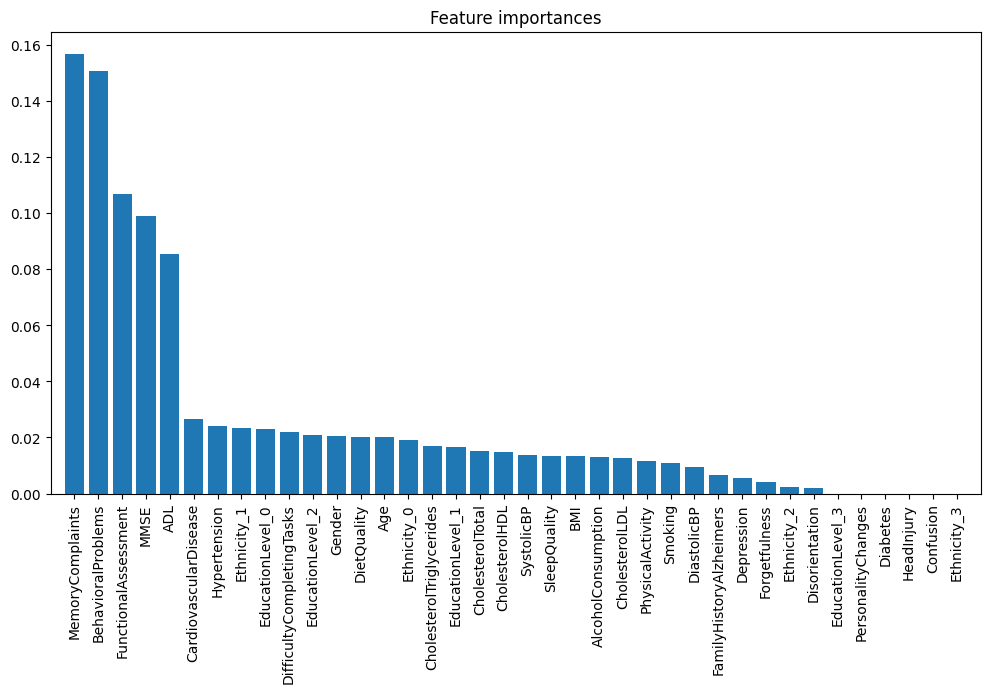

In [59]:
# Crear y ajustar el modelo XGBoost
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualizar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Obtener y mostrar la importancia de las características
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Mostrar las 10 variables más importantes
print("Feature 10 ranking:")
top_10features = []
for f in range(10):
    print(f"{f + 1}. feature {X.columns[indices[f]]} ({importances[indices[f]]})")
    top_10features.append(X.columns[indices[f]])
print("Feature 5 ranking:")
top_5features = []
for f in range(5):
    print(f"{f + 1}. feature {X.columns[indices[f]]} ({importances[indices[f]]})")
    top_5features.append(X.columns[indices[f]])

# Visualizar la importancia de las características
plt.figure(figsize=(12, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [60]:
# Crear un nuevo DataFrame con las 10 variables más importantes y la variable objetivo
selected_columns = top_10features + ['Diagnosis']
df_balanced_top10_XGB = df_balanced[selected_columns]

df_balanced_top10_XGB.to_csv(r'..\DATASET\df_balanced_top10_XGB.csv', index=False, encoding='utf-8')

In [61]:
# Crear un nuevo DataFrame con las 5 variables más importantes y la variable objetivo
selected_columns = top_10features + ['Diagnosis']
df_balanced_top5_XGB = df_balanced[selected_columns]

df_balanced_top5_XGB.to_csv(r'..\DATASET\df_balanced_top5_XGB.csv', index=False, encoding='utf-8')

#### Optimización Hiperparametros XGBoost para balanced dataset

In [62]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import xgboost as xgb

# Leer el dataset
df = pd.read_csv(r'..\DATASET\df_balanced.csv')

# Separar las variables predictoras y la variable objetivo
X = df.drop(['Diagnosis'], axis=1)  # Variables predictoras
y = df['Diagnosis']               # Variable objetivo

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el espacio de parámetros para RandomizedSearchCV
param_dist = {
    'n_estimators': [20, 30, 50, 100],
    'learning_rate': [0.01, 0.02, 0.05, 0.1],
    'max_depth': [18, 20, 30, 50],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0.1, 0.2, 0.3, 0.4]
}

# Crear el objeto XGBoost Classifier
xgb_clf = xgb.XGBClassifier(random_state=42)

# Crear el objeto RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_clf, param_distributions=param_dist, 
                                    n_iter=300, scoring='recall', cv=5, 
                                    n_jobs=-1, verbose=1, random_state=42)

# Ajustar RandomizedSearchCV
random_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y el mejor score
print("Mejores Parámetros:", random_search.best_params_)
print("Mejor Score:", random_search.best_score_)

# Evaluar el mejor modelo en el conjunto de prueba
best_xgb_clf = random_search.best_estimator_
y_pred = best_xgb_clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


C:\Users\Onofre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mejores Parámetros: {'subsample': 1.0, 'n_estimators': 50, 'max_depth': 18, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.9}
Mejor Score: 0.9154269972451792
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       147
           1       0.96      0.96      0.96       157

    accuracy                           0.95       304
   macro avg       0.95      0.95      0.95       304
weighted avg       0.95      0.95      0.95       304

Confusion Matrix:
 [[140   7]
 [  7 150]]


In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_models_on_datasets(models, datasets, target_column='Diagnosis'):

    # Inicializar el DataFrame de métricas
    df_metrics_xgb = pd.DataFrame(columns=[
        'Model', 'Dataset', 'Train Accuracy', 'Test Accuracy', 
        'Train Balanced Accuracy', 'Test Balanced Accuracy',
        'Train Precision', 'Test Precision',
        'Train Recall', 'Test Recall',
        'Train F1 Score', 'Test F1 Score'
    ])
    
    for model_name, model in models.items():
        for dataset_name, df in datasets.items():
            print(f"Evaluando el modelo {model_name} en el dataset {dataset_name}")
            
            # Separar características y variable objetivo
            X = df.drop([target_column], axis=1)
            y = df[target_column]
            
            # Dividir el DataFrame en conjuntos de entrenamiento y prueba
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            # Entrenar el modelo
            model.fit(X_train, y_train)
            
            # Realizar predicciones
            y_pred_train = model.predict(X_train)
            y_pred_test = model.predict(X_test)
            
            # Calcular métricas para el conjunto de entrenamiento y prueba
            metrics = pd.DataFrame([{
                'Model': model_name,
                'Dataset': dataset_name,
                'Train Accuracy': accuracy_score(y_train, y_pred_train),
                'Test Accuracy': accuracy_score(y_test, y_pred_test),
                'Train Balanced Accuracy': balanced_accuracy_score(y_train, y_pred_train),
                'Test Balanced Accuracy': balanced_accuracy_score(y_test, y_pred_test),
                'Train Precision': precision_score(y_train, y_pred_train, average='weighted'),
                'Test Precision': precision_score(y_test, y_pred_test, average='weighted'),
                'Train Recall': recall_score(y_train, y_pred_train, average='weighted'),
                'Test Recall': recall_score(y_test, y_pred_test, average='weighted'),
                'Train F1 Score': f1_score(y_train, y_pred_train, average='weighted'),
                'Test F1 Score': f1_score(y_test, y_pred_test, average='weighted')
            }])
            
            df_metrics_xgb = pd.concat([df_metrics_xgb, metrics], ignore_index=True)
            
            # Reporte de clasificación
            print("Classification Report:\n", classification_report(y_test, y_pred_test))
    
    return df_metrics_xgb



models = {
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42),
    'XGBoost_hiper': XGBClassifier(
        subsample=1.0, n_estimators=50, max_depth=18, learning_rate=0.1, gamma=0.1, 
        colsample_bytree=0.9, random_state=42)
    
}


# Definir los datasets
datasets = {
    'clean': df_clean,
    'balanced': df_balanced,
    'df_balanced_top10_XGB': df_balanced_top10_XGB,
    'df_balanced_top5_XGB': df_balanced_top5_XGB
}

# Evaluar los modelos en los diferentes datasets
df_metrics_xgb = evaluate_models_on_datasets(models, datasets)

# Mostrar las métricas recopiladas
print(df_metrics_xgb)

Evaluando el modelo XGBoost en el dataset clean


C:\Users\Onofre\AppData\Local\Temp\ipykernel_16112\1818170050.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metrics_xgb = pd.concat([df_metrics_xgb, metrics], ignore_index=True)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       277
           1       0.96      0.90      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430

Evaluando el modelo XGBoost en el dataset balanced
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       147
           1       0.95      0.96      0.95       157

    accuracy                           0.95       304
   macro avg       0.95      0.95      0.95       304
weighted avg       0.95      0.95      0.95       304

Evaluando el modelo XGBoost en el dataset df_balanced_top10_XGB
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       147
           1       0.94      0.95      0.95       

In [64]:
df_metrics_xgb

,Model,Dataset,Train Accuracy,Test Accuracy,Train Balanced Accuracy,Test Balanced Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score
0,XGBoost,clean,1.000000,0.951163,1.000000,0.940150,1.000000,0.951388,1.000000,0.951163,1.000000,0.950813
1,XGBoost,balanced,1.000000,0.950658,1.000000,0.950496,1.000000,0.950667,1.000000,0.950658,1.000000,0.950652
2,XGBoost,df_balanced_top10_XGB,1.000000,0.944079,1.000000,0.943910,1.000000,0.944086,1.000000,0.944079,1.000000,0.944072
3,XGBoost,df_balanced_top5_XGB,1.000000,0.944079,1.000000,0.943910,1.000000,0.944086,1.000000,0.944079,1.000000,0.944072
4,XGBoost_hiper,clean,0.999418,0.955814,0.999550,0.946686,0.999419,0.955890,0.999418,0.955814,0.999418,0.955572
5,XGBoost_hiper,balanced,0.999178,0.953947,0.999184,0.953897,0.999179,0.953947,0.999178,0.953947,0.999178,0.953947
6,XGBoost_hiper,df_balanced_top10_XGB,0.976151,0.940789,0.976075,0.940942,0.976304,0.940891,0.976151,0.940789,0.976148,0.940800
7,XGBoost_hiper,df_balanced_top5_XGB,0.976151,0.940789,0.976075,0.940942,0.976304,0.940891,0.976151,0.940789,0.976148,0.940800


Detectamos resultados mejores sobre el dataset CLEAN, buscamos hiperametros sobre CLEAN

In [65]:
df = pd.read_csv(r'..\DATASET\df_clean.csv')
X = df.drop(['Diagnosis'], axis=1) 
y = df['Diagnosis']  

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el espacio de parámetros para RandomizedSearchCV
param_dist = {
    'n_estimators': [20, 30, 50, 100],
    'learning_rate': [0.01, 0.02, 0.05, 0.1],
    'max_depth': [18, 20, 30, 50],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0.1, 0.2, 0.3, 0.4]
}

# Crear el objeto XGBoost Classifier
xgb_clf = xgb.XGBClassifier(random_state=42)

# Crear el objeto RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_clf, param_distributions=param_dist, 
                                    n_iter=300, scoring='recall', cv=5, 
                                    n_jobs=-1, verbose=1, random_state=42)

# Ajustar RandomizedSearchCV
random_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y el mejor score
print("Mejores Parámetros:", random_search.best_params_)
print("Mejor Score:", random_search.best_score_)

# Evaluar el mejor modelo en el conjunto de prueba
best_xgb_clf = random_search.best_estimator_
y_pred = best_xgb_clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Mejores Parámetros: {'subsample': 0.8, 'n_estimators': 30, 'max_depth': 30, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0}
Mejor Score: 0.912640563609267
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       277
           1       0.96      0.92      0.94       153

    accuracy                           0.96       430
   macro avg       0.96      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430

Confusion Matrix:
 [[271   6]
 [ 12 141]]


In [67]:
def evaluate_models_on_datasets(models, datasets, target_column='Diagnosis'):

    # Inicializar el DataFrame de métricas
    df_metrics_xgb = pd.DataFrame(columns=[
        'Model', 'Dataset', 'Train Accuracy', 'Test Accuracy', 
        'Train Balanced Accuracy', 'Test Balanced Accuracy',
        'Train Precision', 'Test Precision',
        'Train Recall', 'Test Recall',
        'Train F1 Score', 'Test F1 Score'
    ])
    
    for model_name, model in models.items():
        for dataset_name, df in datasets.items():
            print(f"Evaluando el modelo {model_name} en el dataset {dataset_name}")
            
            # Separar características y variable objetivo
            X = df.drop([target_column], axis=1)
            y = df[target_column]
            
            # Dividir el DataFrame en conjuntos de entrenamiento y prueba
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            # Entrenar el modelo
            model.fit(X_train, y_train)
            
            # Realizar predicciones
            y_pred_train = model.predict(X_train)
            y_pred_test = model.predict(X_test)
            
            # Calcular métricas para el conjunto de entrenamiento y prueba
            metrics = pd.DataFrame([{
                'Model': model_name,
                'Dataset': dataset_name,
                'Train Accuracy': accuracy_score(y_train, y_pred_train),
                'Test Accuracy': accuracy_score(y_test, y_pred_test),
                'Train Balanced Accuracy': balanced_accuracy_score(y_train, y_pred_train),
                'Test Balanced Accuracy': balanced_accuracy_score(y_test, y_pred_test),
                'Train Precision': precision_score(y_train, y_pred_train, average='weighted'),
                'Test Precision': precision_score(y_test, y_pred_test, average='weighted'),
                'Train Recall': recall_score(y_train, y_pred_train, average='weighted'),
                'Test Recall': recall_score(y_test, y_pred_test, average='weighted'),
                'Train F1 Score': f1_score(y_train, y_pred_train, average='weighted'),
                'Test F1 Score': f1_score(y_test, y_pred_test, average='weighted')
            }])
            
            df_metrics_xgb = pd.concat([df_metrics_xgb, metrics], ignore_index=True)
            
            # Reporte de clasificación
            print("Classification Report:\n", classification_report(y_test, y_pred_test))
    
    return df_metrics_xgb

# Definir los modelos
from xgboost import XGBClassifier

models = {
    'XGBoost': XGBClassifier(eval_metric='logloss', random_state=42),
    'XGBoost_hiper': XGBClassifier(
        subsample=1.0, n_estimators=50, max_depth=18, learning_rate=0.1, gamma=0.1, 
        colsample_bytree=0.9, random_state=42),
    'XGBoost_hiper_2': XGBClassifier(
        subsample=0.8, n_estimators=30, max_depth=30, learning_rate=0.05, gamma=0.1, 
        colsample_bytree=1.0, random_state=42)
    
}

# Definir los datasets
datasets = {
    'clean': df_clean,
    'balanced': df_balanced,
    'balanced_top10_XGB': df_balanced_top10_XGB,
    'balanced_top5_XGB': df_balanced_top5_XGB
}

# Evaluar los modelos en los diferentes datasets
df_metrics_xgb = evaluate_models_on_datasets(models, datasets)

# Mostrar las métricas recopiladas
print(df_metrics_xgb)

Evaluando el modelo XGBoost en el dataset clean


C:\Users\Onofre\AppData\Local\Temp\ipykernel_16112\1341118914.py:46: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_metrics_xgb = pd.concat([df_metrics_xgb, metrics], ignore_index=True)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       277
           1       0.96      0.90      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430

Evaluando el modelo XGBoost en el dataset balanced
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       147
           1       0.95      0.96      0.95       157

    accuracy                           0.95       304
   macro avg       0.95      0.95      0.95       304
weighted avg       0.95      0.95      0.95       304

Evaluando el modelo XGBoost en el dataset balanced_top10_XGB
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94       147
           1       0.94      0.95      0.95       157

In [68]:
df_metrics_xgb

,Model,Dataset,Train Accuracy,Test Accuracy,Train Balanced Accuracy,Test Balanced Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score
0,XGBoost,clean,1.000000,0.951163,1.000000,0.940150,1.000000,0.951388,1.000000,0.951163,1.000000,0.950813
1,XGBoost,balanced,1.000000,0.950658,1.000000,0.950496,1.000000,0.950667,1.000000,0.950658,1.000000,0.950652
2,XGBoost,balanced_top10_XGB,1.000000,0.944079,1.000000,0.943910,1.000000,0.944086,1.000000,0.944079,1.000000,0.944072
3,XGBoost,balanced_top5_XGB,1.000000,0.944079,1.000000,0.943910,1.000000,0.944086,1.000000,0.944079,1.000000,0.944072
4,XGBoost_hiper,clean,0.999418,0.955814,0.999550,0.946686,0.999419,0.955890,0.999418,0.955814,0.999418,0.955572
5,XGBoost_hiper,balanced,0.999178,0.953947,0.999184,0.953897,0.999179,0.953947,0.999178,0.953947,0.999178,0.953947
6,XGBoost_hiper,balanced_top10_XGB,0.976151,0.940789,0.976075,0.940942,0.976304,0.940891,0.976151,0.940789,0.976148,0.940800
7,XGBoost_hiper,balanced_top5_XGB,0.976151,0.940789,0.976075,0.940942,0.976304,0.940891,0.976151,0.940789,0.976148,0.940800
8,XGBoost_hiper_2,clean,0.961606,0.958140,0.954238,0.949954,0.961592,0.958162,0.961606,0.958140,0.961455,0.957945
9,XGBoost_hiper_2,balanced,0.959704,0.950658,0.959613,0.950496,0.959907,0.950667,0.959704,0.950658,0.959696,0.950652


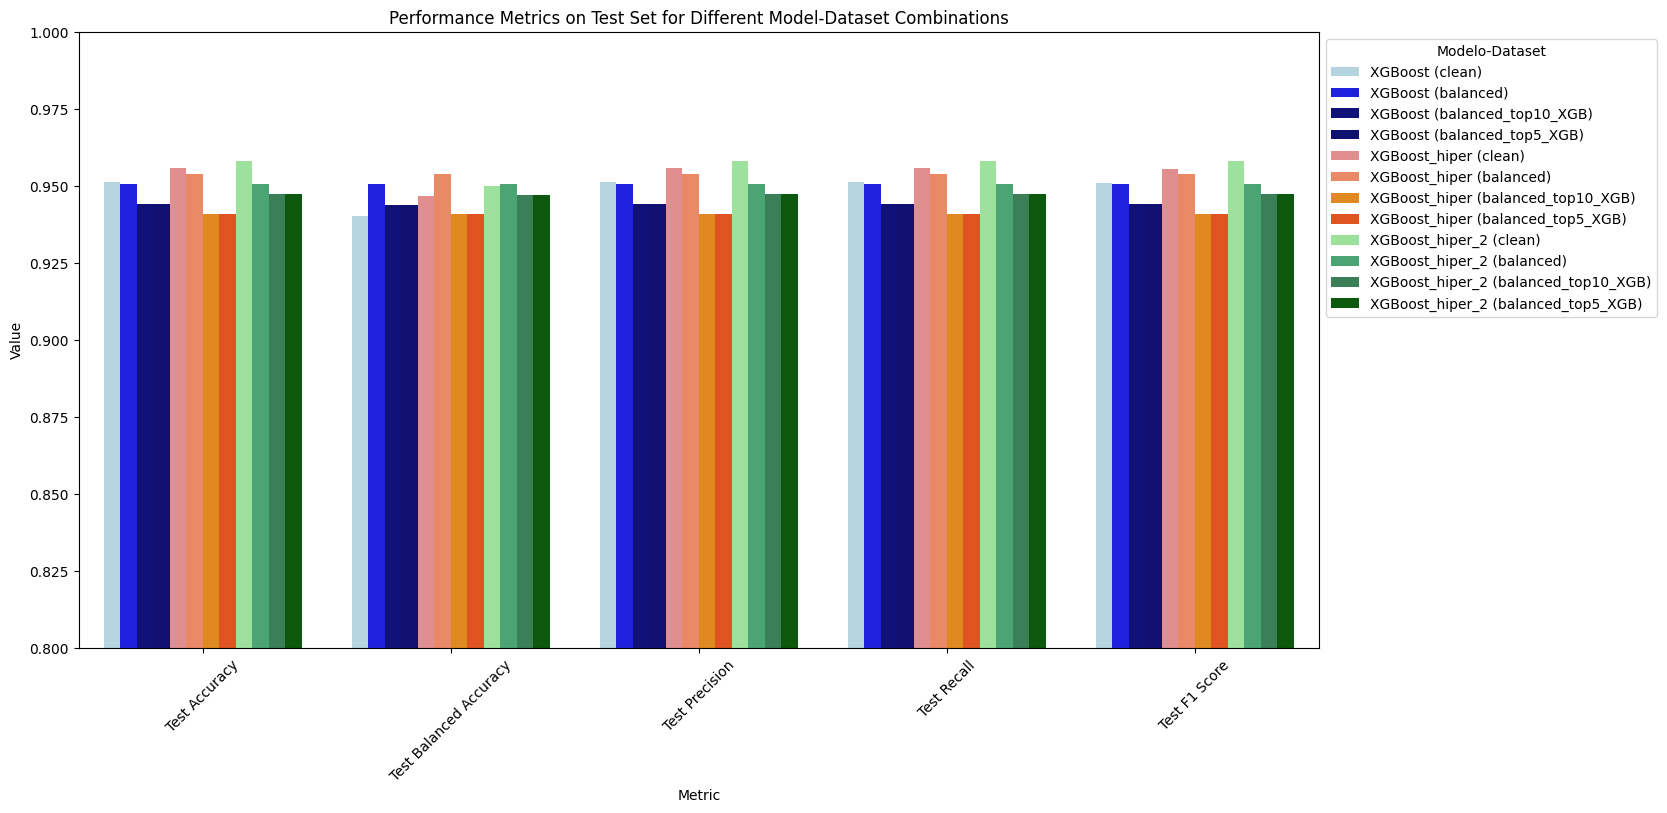

In [74]:
# Reformatear el DataFrame para la gráfica
df_melted = df_metrics_xgb.melt(id_vars=['Model', 'Dataset'], 
                    value_vars=['Test Accuracy', 'Test Balanced Accuracy', 'Test Precision', 'Test Recall', 'Test F1 Score'],
                    var_name='Metric', value_name='Value')

# Crear una nueva columna para combinar Modelo y Dataset
df_melted['Model_Dataset'] = df_melted['Model'] + ' (' + df_melted['Dataset'] + ')'

# Definir una paleta de colores personalizada
palette = {
    'XGBoost (clean)': 'lightblue',
    'XGBoost (balanced)': 'blue',
    'XGBoost (balanced_top10_XGB)': 'darkblue',
    'XGBoost (balanced_top5_XGB)': 'navy',
    'XGBoost_hiper (clean)': 'lightcoral',
    'XGBoost_hiper (balanced)': 'coral',
    'XGBoost_hiper (balanced_top10_XGB)': 'darkorange',
    'XGBoost_hiper (balanced_top5_XGB)': 'orangered',
    'XGBoost_hiper_2 (clean)': 'lightgreen',
    'XGBoost_hiper_2 (balanced)': 'mediumseagreen',
    'XGBoost_hiper_2 (balanced_top10_XGB)': 'seagreen',
    'XGBoost_hiper_2 (balanced_top5_XGB)': 'darkgreen'
}

# Crear la gráfica de barras
plt.figure(figsize=(16, 8))
sns.barplot(data=df_melted, x='Metric', y='Value', hue='Model_Dataset', errorbar=None, palette=palette)

# Ajustar los límites del eje Y
plt.ylim(0.80, 1.00)

# Agregar etiquetas y título
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Performance Metrics on Test Set for Different Model-Dataset Combinations')

# Mostrar la gráfica
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Modelo-Dataset')
plt.xticks(rotation=45)
plt.show()


### Validacion Cruzada Mejores modelos

Random Forest TOP 5 balanced

In [70]:
df = pd.read_csv(r'..\DATASET\df_balanced_top5_RF.csv')
X = df.drop(['Diagnosis'], axis=1)  
y = df['Diagnosis']               

   Fold  Accuracy  Balanced Accuracy  Precision    Recall  F1 Score
0     1  0.950820           0.948711   0.951151  0.950820  0.950726
1     2  0.893443           0.895749   0.902644  0.893443  0.893120
2     3  0.950820           0.951840   0.951438  0.950820  0.950873
3     4  0.934426           0.934409   0.934426  0.934426  0.934426
4     5  0.934426           0.934426   0.936302  0.934426  0.934356
5     6  0.918033           0.918033   0.918483  0.918033  0.918011
6     7  0.933884           0.933771   0.933884  0.933884  0.933884
7     8  0.966942           0.966803   0.967444  0.966942  0.966929
8     9  0.942149           0.937879   0.944814  0.942149  0.941827
9    10  0.950413           0.951206   0.951001  0.950413  0.950447
            Dataset  Accuracy  Balanced Accuracy  Precision    Recall  \
0  Cross-Validation  0.937536           0.937283   0.939159  0.937536   

   F1 Score  
0   0.93746  
  Dataset  Accuracy  Balanced Accuracy  Precision    Recall  F1 Score
0    Te

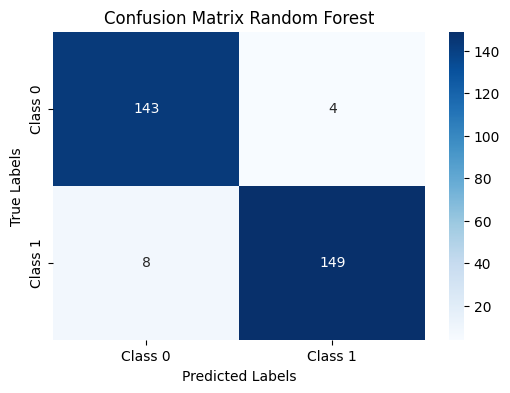

In [71]:
# Dividir el dataset en conjuntos de entrenamiento/validación y prueba
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Configurar la validación cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Almacenar las métricas para cada pliegue
fold_metrics = {
    'Fold': [],
    'Accuracy': [],
    'Balanced Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Ejecutar la validación cruzada
for fold, (train_index, val_index) in enumerate(kf.split(X_train_val)):
    X_train_fold, X_val_fold = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train_fold, y_val_fold = y_train_val.iloc[train_index], y_train_val.iloc[val_index]
    
    # Entrenar el modelo
    model.fit(X_train_fold, y_train_fold)
    
    # Realizar predicciones
    y_val_pred = model.predict(X_val_fold)
    
    # Calcular métricas
    fold_metrics['Fold'].append(fold + 1)
    fold_metrics['Accuracy'].append(accuracy_score(y_val_fold, y_val_pred))
    fold_metrics['Balanced Accuracy'].append(balanced_accuracy_score(y_val_fold, y_val_pred))
    fold_metrics['Precision'].append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    fold_metrics['Recall'].append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    fold_metrics['F1 Score'].append(f1_score(y_val_fold, y_val_pred, average='weighted'))

# Crear una tabla con todas las métricas
fold_metrics_table = pd.DataFrame(fold_metrics)

# Calcular métricas promedio
mean_metrics = {
    'Dataset': ['Cross-Validation'],
    'Accuracy': [pd.Series(fold_metrics['Accuracy']).mean()],
    'Balanced Accuracy': [pd.Series(fold_metrics['Balanced Accuracy']).mean()],
    'Precision': [pd.Series(fold_metrics['Precision']).mean()],
    'Recall': [pd.Series(fold_metrics['Recall']).mean()],
    'F1 Score': [pd.Series(fold_metrics['F1 Score']).mean()]
}

mean_metrics_table = pd.DataFrame(mean_metrics)

print(fold_metrics_table)
print(mean_metrics_table)

# Evaluar el modelo en el conjunto de prueba
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Crear una tabla con todas las métricas del conjunto de prueba
test_metrics_table = pd.DataFrame({
    'Dataset': ['Test'],
    'Accuracy': [test_accuracy],
    'Balanced Accuracy': [test_balanced_accuracy],
    'Precision': [test_precision],
    'Recall': [test_recall],
    'F1 Score': [test_f1]
})

print(test_metrics_table)
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Crear la gráfica de la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Random Forest')
plt.show()

XGBoost Hiper 2 clean

In [72]:
df = pd.read_csv(r'..\DATASET\df_clean.csv')
X = df.drop(['Diagnosis'], axis=1) 
y = df['Diagnosis']           

   Fold  Accuracy  Balanced Accuracy  Precision    Recall  F1 Score
0     1  0.947674           0.936023   0.947469  0.947674  0.947535
1     2  0.976744           0.978251   0.977211  0.976744  0.976834
2     3  0.947674           0.931818   0.951769  0.947674  0.946826
3     4  0.947674           0.947352   0.948985  0.947674  0.948014
4     5  0.941860           0.927536   0.947006  0.941860  0.940935
5     6  0.959302           0.950587   0.959483  0.959302  0.959072
6     7  0.959302           0.948388   0.959144  0.959302  0.959185
7     8  0.965116           0.953202   0.965687  0.965116  0.964808
8     9  0.889535           0.886049   0.891125  0.889535  0.890049
9    10  0.947368           0.939471   0.948368  0.947368  0.947009
            Dataset  Accuracy  Balanced Accuracy  Precision    Recall  \
0  Cross-Validation  0.948225           0.939868   0.949625  0.948225   

   F1 Score  
0  0.948026  
  Dataset  Accuracy  Balanced Accuracy  Precision    Recall  F1 Score
0    Te

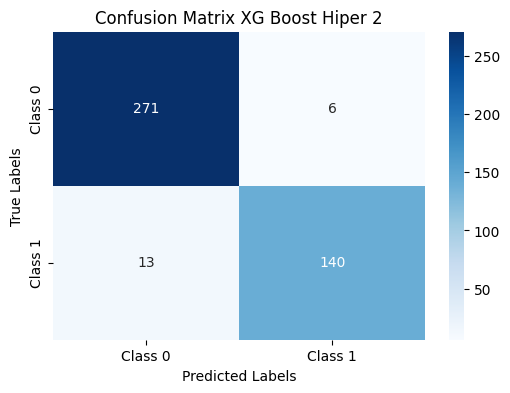

In [73]:
# Dividir el dataset en conjuntos de entrenamiento/validación y prueba
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el xgb
model = XGBClassifier(
        subsample=0.8, n_estimators=30, max_depth=30, learning_rate=0.05, gamma=0.1, 
        colsample_bytree=1.0, random_state=42)

# Configurar la validación cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Almacenar las métricas para cada pliegue
fold_metrics = {
    'Fold': [],
    'Accuracy': [],
    'Balanced Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Ejecutar la validación cruzada
for fold, (train_index, val_index) in enumerate(kf.split(X_train_val)):
    X_train_fold, X_val_fold = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train_fold, y_val_fold = y_train_val.iloc[train_index], y_train_val.iloc[val_index]
    
    
    model.fit(X_train_fold, y_train_fold)
    y_val_pred = model.predict(X_val_fold)
    
    # Calcular métricas
    fold_metrics['Fold'].append(fold + 1)
    fold_metrics['Accuracy'].append(accuracy_score(y_val_fold, y_val_pred))
    fold_metrics['Balanced Accuracy'].append(balanced_accuracy_score(y_val_fold, y_val_pred))
    fold_metrics['Precision'].append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    fold_metrics['Recall'].append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    fold_metrics['F1 Score'].append(f1_score(y_val_fold, y_val_pred, average='weighted'))

# Crear una tabla con todas las métricas
fold_metrics_table = pd.DataFrame(fold_metrics)

# Calcular métricas promedio
mean_metrics = {
    'Dataset': ['Cross-Validation'],
    'Accuracy': [pd.Series(fold_metrics['Accuracy']).mean()],
    'Balanced Accuracy': [pd.Series(fold_metrics['Balanced Accuracy']).mean()],
    'Precision': [pd.Series(fold_metrics['Precision']).mean()],
    'Recall': [pd.Series(fold_metrics['Recall']).mean()],
    'F1 Score': [pd.Series(fold_metrics['F1 Score']).mean()]
}

mean_metrics_table = pd.DataFrame(mean_metrics)

print(fold_metrics_table)
print(mean_metrics_table)

# Evaluar el modelo en el conjunto de prueba
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Crear una tabla con todas las métricas del conjunto de prueba
test_metrics_table = pd.DataFrame({
    'Dataset': ['Test'],
    'Accuracy': [test_accuracy],
    'Balanced Accuracy': [test_balanced_accuracy],
    'Precision': [test_precision],
    'Recall': [test_recall],
    'F1 Score': [test_f1]
})

print(test_metrics_table)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Crear la gráfica de la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix XG Boost Hiper 2')
plt.show()